# Figure 6: PSD of Elasser Variables // Fluctuations

- PSD of Elasser variables \& fit
- PSD of velocity/magnetic field fluctuations  
- Quantification of Noise Floor of SPAN-I

In [ ]:
# !pip install tabulate
# !pip install ssqueezepy

In [1]:
import glob
# import pyspedas
# from pyspedas import time_string, time_double
# from pytplot import tplot, get_data, cdf_to_tplot, store_data
import astrospice
import sunpy 
import sunpy.coordinates as scoords
from scipy.interpolate import interp1d
from astropy.coordinates import SkyCoord
from scipy import stats

from scipy.optimize import curve_fit
from tabulate import tabulate

import sys, os
import datetime
import numpy as np
sys.path.append(os.path.realpath(''))
import pandas as pd
import astropy.units as u
import matplotlib.pyplot as plt

import utilities as utils
import sigma as sigma
# import tools.psp_funcs as psp_funcs
# import tools.pfss_funcs as pfss_funcs
# from tools.plotting import plot_pfss
# from tools.settings import CsvDir, ImgDir, PlotDir, DataDir
import matplotlib.ticker as ticker
from scipy.signal.windows import tukey

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

import ssqueezepy

from datetime import timedelta

# for sc in ['psp','solar orbiter'] : kernels = astrospice.registry.get_kernels(sc,'predict') 

# REGIONS
loc_hcs = [61.5, 62.2]
loc_hcs1 = [357.7, 357.9]
ssw = [9, 19]
fsw = [42, 52]

# COLORS
scol, hcol, fcol, rcol = ['lavender', 'azure', 'lavenderblush', 'grey']
cc = ['lightpink', 'mediumspringgreen', 'peachpuff', 'powderblue', 'thistle', 'palegoldenrod']

# DIRECTORIES
RES_DIR = os.path.join('/Users/tamarervin/', 'e15_results')
FIG_DIR = os.path.realpath('figures')
EPS_DIR = os.path.realpath('eps_figures')
OBS_DIR = '/Users/tamarervin/products/csv_files/calcs/'
PlotDir = '/Users/tamarervin/mplstyle/'


# PLOT STYLING
plot_style = os.path.join(PlotDir, 'figure_series.mplstyle')
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.cal'] = 'Helvetica Neue LT Pro'
plt.rcParams.update({'font.size': 20})
plt.style.use(plot_style)
plt.rcParams['axes.linewidth'] = 5

enc='E15'


In [2]:
def plot_elsasser(Zp, Zm, ih, il, im, uh, ul, FT):
    # Plot the PSD

    fig, [ax1, ax2] = plt.subplots(1, 2, figsize=[20, 10], sharex='all', sharey='all', gridspec_kw={'hspace': 0.05, 'wspace':0.1})
    colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']
    labels=[r'$\mathbf{z}^+$', r'$\mathbf{z}^-$', r'$\delta \mathbf{v}$', r'$\delta \mathbf{b}$']
    lw=2
    ##### -------- ELASSER SPECTRA #####
    ax = ax1
    for i, psd_spec in enumerate([Zp]):
        ax.plot(psd_spec.freq, psd_spec.power, c=colors[i], label=labels[i], linewidth=lw)
        
    ax.plot(Zp.freq[uh], np.exp(ih)*(Zp.freq[uh]**-1), c='k', linestyle='dashed', label=f'$f^{{{-1}}}$', zorder=10, lw=3)
    ax.plot(Zp.freq[ul], np.exp(il)*(Zp.freq[ul]**-1.5), c='cyan', label=f'$f^{{{-1.5}}}$', zorder=10, lw=3)

    # ax.plot(psd_Zp3.freq[u3h], np.exp(i3h)*(psd_Zp3.freq[u3h]**e3h), c='k', linestyle='dashed', label=f'$f^{{{e3h:.2f}}}$', zorder=10, lw=3)
    # ax.plot(psd_Zp3.freq[u3l], np.exp(i3l)*(psd_Zp3.freq[u3l]**e3l), c='chocolate', label=f'$f^{{{e3l:.2f}}}$', zorder=10, lw=3)

    ax.axvline(FT, c='k', linestyle='dashed')


    ### LEGEND
    ax.legend(loc='lower left', fontsize=20)

    ### ADD PANEL LABELS
    ax.text(0.92, 0.95, '(a)', transform=ax.transAxes, fontsize=20, fontweight='bold', va='top', ha='left')
    ax.set_xlabel(r'$\rm Frequency \; [Hz]$', fontsize=20)
    ax.set_ylabel(r'$\rm PSD \; [km^2 \; s^{-1} \; Hz^{-1}]$', fontsize=20)
    ax.tick_params(axis='both', which='major', labelsize=18) 
    ax.set_xscale('log')  
    ax.set(xlim=(5e-5, 5e-1))
    ax.set_yscale('log')
    ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='lightgray')

    ##### -------- ELASSER SPECTRA #####
    ax = ax2
    for i, psd_spec in enumerate([Zm]): # , 
        ax.plot(psd_spec.freq, psd_spec.power, c=colors[i+1], label=labels[i+1], linewidth=lw)
        
    # ax.plot(psd_Zm3.freq, np.exp(i3lm)*(psd_Zm3.freq**e3lm), c='slateblue', label=f'$f^{{{e3lm:.2f}}}$', zorder=10, lw=3)
    ax.plot(Zm.freq, np.exp(im)*(Zm.freq**-1.25), c='green', label=f'$f^{{{-1.25}}}$', zorder=10, lw=3)

    ax.axvline(FT, c='k', linestyle='dashed')


    ### LEGEND
    ax.legend(loc='lower left', fontsize=20)

    ### ADD PANEL LABELS
    ax.text(0.92, 0.95, '(b)', transform=ax.transAxes, fontsize=20, fontweight='bold', va='top', ha='left')
    ax.set_xlabel(r'$\rm Frequency \; [Hz]$', fontsize=20)
    ax.set_ylabel(r'$\rm PSD \; [km^2 \; s^{-1} \; Hz^{-1}]$', fontsize=20)
    ax.tick_params(axis='both', which='major', labelsize=18) 
    ax.set_xscale('log')  
    ax.set(xlim=(5e-5, 5e-1))
    ax.set_yscale('log')
    ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='lightgray')

In [3]:
import ssqueezepy

def trace_PSD_cwt_ssqueezepy(x,
                             y,
                             z,
                             dt,
                             order=0,
                             nv            = 16,
                             scales_type   = 'log-piecewise',
                             wavelet       = None,
                             wname         = None,
                             l1_norm       = False,
                             est_PSD       = True,
                             est_mod       = False):
    """
    Method to calculate the wavelet coefficients and  power spectral density using the Morlet wavelet method.
    Parameters
    ----------
    x,y,z: array-like
        the components of the field to apply wavelet tranform
    dt: float
        the sampling time of the timeseries
       
    scales: str['log', 'log-piecewise', 'linear', 'log:maximal', ...]
                / np.ndarray
            CWT scales.
    Returns
    -------
    W_x, W_y, W_zz: array-like
        component coeficients of th wavelet tranform
    freq : list
        Frequency of the corresponding psd points.
    psd : list
        Power Spectral Density of the signal.
    scales : list
        The scales at which wavelet was estimated
    """
    N = len(x)
    x = np.nan_to_num(x, posinf = 0)
    y = np.nan_to_num(y, posinf = 0)
    z = np.nan_to_num(z, posinf = 0)

    if wavelet is None:
        wavelet    = ssqueezepy.Wavelet(('morlet', {'mu': 13.4}))
    else:
        wavelet    =  wname # ssqueezepy.Wavelet((wname, {'mu': 13.4}))  
       
    if  scales_type  is  None:
        scales_type  = 'log'

    # Estimate sampling frequency
    fs          = 1/dt
   
    # Estimate wavelet coefficients
    Wx, scales  = ssqueezepy.cwt(x, wavelet,  scales_type , fs, l1_norm=l1_norm, nv=nv, order=order)
    Wy, _       = ssqueezepy.cwt(y, wavelet, scales_type , fs, l1_norm=l1_norm, nv=nv, order=order)
    Wz, _       = ssqueezepy.cwt(z, wavelet, scales_type , fs, l1_norm=l1_norm, nv=nv, order=order)
     
    if est_mod:
        Wmod , _  = ssqueezepy.cwt(np.sqrt(x**2 + y**2 + z**2), wavelet,  scales_type , fs, l1_norm=l1_norm, nv=nv)
    else:
        Wmod      = None
   
    # Estimate corresponding frequencies
    freqs       = ssqueezepy.experimental.scale_to_freq(scales, wavelet, len(x), fs)
   
    if est_PSD:
        # Estimate trace powers pectral density
        PSD        = (np.nanmean(np.abs(Wx)**2, axis=1) + np.nanmean(np.abs(Wy)**2, axis=1) + np.nanmean(np.abs(Wz)**2, axis=1))*( 2/fs)
        PSD_non_mean = (np.abs(Wx)**2 + np.abs(Wy)**2 + np.abs(Wz)**2)*( 2/fs)
        
        if est_mod:
            PSD_mod = (np.nanmean(np.abs(Wmod)**2, axis=1)  )*( 2/fs)
        else:
            PSD_mod     = None
    else:
        PSD        = None
        PSD_mod     = None
   
    
    return Wx, Wy, Wz, Wmod, freqs, PSD, PSD_non_mean, PSD_mod, scales # On purpose! only 

In [4]:
def morlet_1D(x, sample_rate=3.5, nv = 16, 
                               order=0,
                             scales_type   = 'log-piecewise',
                             wavelet       = None,
                             wname         = None,
                             l1_norm       = False):

    ### RESAMPLE DATA
    N = len(x)
    fs = 1/sample_rate
    
    if wavelet is None:
        wavelet    = ssqueezepy.Wavelet(('morlet', {'mu': 13.4}))
    else:
        wavelet    = ssqueezepy.Wavelet((wname, {'mu': 13.4}))  
       
    # Calculate the power spectral density
    Wx, scales = ssqueezepy.cwt(np.sqrt(x)**2, wavelet,  scales_type, fs, l1_norm=l1_norm, nv=nv, order=order)
    PSD = (2/fs) * (np.nanmean(np.abs(Wx)**2, axis=1))  
    freqs = ssqueezepy.experimental.scale_to_freq(scales, wavelet, len(x), fs)

    return freqs, PSD


In [5]:
def fourier(x, y, z, sample_rate=3.5):
    x = np.nan_to_num(x, posinf = 0)
    y = np.nan_to_num(y, posinf = 0)
    z = np.nan_to_num(z, posinf = 0)
    N = len(x)

    
    ### FOURIER TRANSFORM
    Wx = np.fft.rfft(x)
    Wy = np.fft.rfft(y)
    Wz = np.fft.rfft(z)
    freq = np.fft.rfftfreq(N, sample_rate)

    ### POWER
    Px =  2 * (np.abs(Wx) ** 2) / N * sample_rate
    Py =  2 * (np.abs(Wx) ** 2) / N * sample_rate
    Pz =  2 * (np.abs(Wx) ** 2) / N * sample_rate

    psd = (Px + Py + Pz)

        
    return freq, psd

def fourier_1D(x, sample_rate=3.5):
    # y, z, 
    x = np.nan_to_num(x, posinf = 0)
    N = len(x)
    # y = np.nan_to_num(y, posinf = 0)
    # z = np.nan_to_num(z, posinf = 0)
    ### RESAMPLE DATA
    ### Create a Tukey window
    alpha = 0.5 
    tukey_window = tukey(len(x), alpha)
    # windowed_time_series = time_series * tukey_window
    # Wx = 2 * np.fft.fft(x * tukey_window) / N
    # Wy = 2 * np.fft.fft(y * tukey_window) / N
    # Wz = 2 * np.fft.fft(z * tukey_window) / N

    ### FOURIER TRANSFORM
    Wx = np.fft.rfft(x)
    # Wy = np.fft.rfft(y)
    # Wz = np.fft.rfft(z)
    freq = np.fft.rfftfreq(len(x), sample_rate)

    ### POWER
    Px =  2 * (np.abs(Wx) ** 2) / N * sample_rate
    # Py =  2 * (np.abs(Wx) ** 2) / N * sample_rate
    # Pz =  2 * (np.abs(Wx) ** 2) / N * sample_rate
    # power_spectrum = (2*sample_rate) * np.abs(fft_result)**2

    # normalize by the tukey window
    # ww = 1/2 * (1 - np.cos((2 * np.pi * np.arange(0, N * alpha / 2)) / (alpha * N)))
    # ww1 = 1/2 * (1 - np.cos((2 * np.pi * np.arange(N / 2 + N * alpha / 2, N)) / (alpha * N)))

    # # Create the piecewise function
    # y1 = ww
    # x2 = np.arange(N * alpha / 2, N / 2 + N * alpha / 2)
    # y2 = np.ones(len(x2))
    # y3 = ww1

    ## CALCULATE Wss
    # Wss = np.sum(np.concatenate((y1, y2, y3)) ** 2) / N
    psd = Px #  *(2 * N * sample_rate) # / Wss
    # W.append(power_spectrum)
        
    return freq, psd

In [6]:
def TracePSD(x, y, z, dt,
             remove_mean       = False,
             return_components = False,
             return_mod        = False):
    """
    Estimate Fourier Power Spectral Density (PSD) for a trace composed of three orthogonal components.

    Parameters:
        x, y, z (np.ndarray or pandas.Series): Timeseries data for the three components.
        dt (float): Time step (1/sampling frequency).
        remove_mean (bool, optional): If True, remove the mean from the input timeseries. Default is False.
        return_components (bool, optional): If True, return the PSD for individual components. Default is False.
        return_mod (bool, optional): If True, return the modulus PSD. Default is False.

    Returns:
        tuple: Depending on `return_components` and `return_mod`, a tuple containing:
               - freqs (np.ndarray): Array of frequencies.
               - B_pow (np.ndarray): Power spectral density estimates of the trace or individual components and/or modulus.
    """
    x = np.nan_to_num(x, posinf = 0)
    y = np.nan_to_num(y, posinf = 0)
    z = np.nan_to_num(z, posinf = 0)
    if not isinstance(x, np.ndarray):
        x = x.values
        y = y.values
        z = z.values

    if remove_mean:
        x -= np.nanmean(x)
        y -= np.nanmean(y)
        z -= np.nanmean(z)

    N = len(x)

    xf = np.fft.rfft(x)
    yf = np.fft.rfft(y)
    zf = np.fft.rfft(z)

    p_X     = 2 * (np.abs(xf) ** 2) / N * dt
    p_Y     = 2 * (np.abs(yf) ** 2) / N * dt
    p_Z     = 2 * (np.abs(zf) ** 2) / N * dt
    p_Trace = p_X + p_Y + p_Z

    freqs = np.fft.rfftfreq(N, dt)

    if return_mod:
        mod = np.sqrt(x**2 + y**2 + z**2)
        p_Mod = 2 * (np.abs(np.fft.rfft(mod)) ** 2) / N * dt
        return freqs, p_Trace, p_X, p_Y, p_Z, p_Mod

    if return_components:
        return freqs, p_Trace, p_X, p_Y, p_Z

    return freqs, p_Trace

# Data

In [7]:
df = pd.read_csv('/Users/tamarervin/e15_results/turb.csv')
df['timestamp'] = pd.to_datetime(df['Time'])
df['use_dens'] = df['Np'].rolling(window=171, min_periods=1).mean()

df['Time'] = [datetime.datetime.strptime(d, '%Y-%m-%d %H:%M:%S.%f') for d in df.Time]
df['polarity'] = np.sign(df.Br)
df['polarity'] = df['polarity'].rolling(window=171, min_periods=1).mean()
df['sigmac'],df['sigmar'], df['vA'], df['Zp'],df['Zm'], df['deltav'], df['deltab'], df['rA'] = sigma.calc_sigma(df, num=341*3)
[Zpr, Zpt, Zpn], [Zmr, Zmt, Zmn], [dvr, dvt, dvn], [dbr, dbt, dbn] = sigma.calc_components(df, num=341*3)

# Read in Data

In [ ]:
time_range = ['2023-03-16/12:00', '2023-03-17/06:00']
fields_vars = pyspedas.psp.fields(trange=time_range, time_clip=True, datatype='mag_RTN_4_Sa_per_Cyc')
pvars = pyspedas.psp.spi(trange=time_range, datatype='sf00_l3_mom', level='l3', time_clip=True)


In [ ]:
fields_files = glob.glob(os.path.join(os.path.realpath(os.path.join('psp_data', 'fields/l2/mag_rtn_4_per_cycle/2023')), "*"), recursive=True)
proton_files = glob.glob(os.path.join(os.path.realpath(os.path.join('psp_data', 'sweap/spi/l3/spi_sf00_l3_mom/2023')), "*"), recursive=True)
fields_vars = cdf_to_tplot(fields_files)
pvars = cdf_to_tplot(proton_files)

In [ ]:
# dt = get_data('psp_spi_VEL_RTN_SUN')
# dt2 = get_data('psp_spi_DENS')
# dt3 = get_data('psp_spi_TEMP')
dt = get_data('VEL_RTN_SUN')
dt2 = get_data('DENS')
dt3 = get_data('TEMP')
date_obj = [datetime.datetime.strptime(time_string(d), '%Y-%m-%d %H:%M:%S.%f') for d in dt.times]

rd = {'Time': date_obj, 'vr': np.abs(dt.y[:, 0]), 'vt': dt.y[:, 1], 'vn': dt.y[:, 2], 'Np': dt2.y, 'Tp': dt3.y}
df = pd.DataFrame(data=rd)

### ADD ANGLE
# vx, vy, vz = [get_data('psp_spi_VEL_SC').y[:, i] for i in np.arange(0, 3)]
# mx, my, mz = [get_data('psp_spi_MAGF_SC').y[:, i] for i in np.arange(0, 3)]
vx, vy, vz = [get_data('VEL_SC').y[:, i] for i in np.arange(0, 3)]
mx, my, mz = [get_data('MAGF_SC').y[:, i] for i in np.arange(0, 3)]
vdotb = vx*mx + vy*my + vz*mz
v = np.sqrt(vx**2 + vy**2 + vz**2)
b = np.sqrt(mx**2 + my**2 + mz**2)
angle_vb = np.arccos(vdotb/(v*b))

df['angle_vb'] = np.rad2deg(angle_vb)

df

In [ ]:
plt.plot(df.Time, df.angle_vb)

In [ ]:
dt = get_data('psp_fld_l2_mag_RTN_4_Sa_per_Cyc')
date_obj = [datetime.datetime.strptime(time_string(d), '%Y-%m-%d %H:%M:%S.%f') for d in dt.times]

rd = {'Time': date_obj, 'Br': dt.y[:, 0], 'Bt': dt.y[:, 1], 'Bn': dt.y[:, 2]}
dfmag = pd.DataFrame(data=rd)
dfmag['B'] = np.sqrt(dfmag.Br**2 + dfmag.Bn**2 + dfmag.Bt**2)
dfmag

In [ ]:
df = pd.merge_asof(df, dfmag)
df

In [ ]:
df['VA'] = df.B * 1e-9 / np.sqrt(1.25e-6 * df.Np * 1e6 * 1.67e-27) / 1000.0
df['mA'] = df.vr / df.VA
plt.plot(df.Time, df.mA)

In [ ]:
### CALCULATE DENSITY AVERAGE: TEN MINUTE INTERVAL
df['timestamp'] = pd.to_datetime(df['Time'])
df['use_dens'] = df['Np'].rolling(window=171, min_periods=1).mean()
df

plt.figure(figsize=(12, 6))
plt.plot(df.Time, df.Np, c='red', label='Np')
plt.plot(df.Time, df.use_dens, c='k', label='Average')
plt.title('10-minute Moving Average over $N_p$ used for turbulence parameters')

In [ ]:
### CALCULATE CROSS HELICITY VALUES
df['sigmac'],df['sigmar'], df['vA'], df['Zp'],df['Zm'], df['deltav'], df['deltab'] = sigma.calc_sigma(df, num=314)
plt.plot(df.Time, df.deltav)
plt.plot(df.Time, df.deltab)
plt.plot(df.Time, df.Zp)
plt.plot(df.Time, df.Zm)

In [ ]:
tplot(['psp_spi_VEL_RTN_SUN', 'psp_spi_EFLUX_VS_ENERGY',
 'psp_spi_EFLUX_VS_THETA',
 'psp_spi_EFLUX_VS_PHI','psp_spi_DENS', 'psp_fld_l2_mag_RTN_4_Sa_per_Cyc'])

# Period Identification

In [18]:
### RESAMPLE 
turb = df

ss, ii = 6180//3, 3

### PERIOD ONE
use1 = np.logical_and(turb.Time >= pd.Timestamp('2023-03-16 12:00'), turb.Time <= pd.Timestamp('2023-03-16 18:00:00'))
t1 = turb[use1].copy()
tZp = [t1.Zp[i*ss:i*ss+ss] for i in range(0, ii)]
tZm = [t1.Zm[i*ss:i*ss+ss] for i in range(0, ii)]
tdv = [t1.deltav[i*ss:i*ss+ss] for i in range(0, ii)]
tdb = [t1.deltab[i*ss:i*ss+ss] for i in range(0, ii)]

### PERIOD TWO
use2 = np.logical_and(turb.Time >= pd.Timestamp('2023-03-16 18:00:00'), turb.Time <= pd.Timestamp('2023-03-17 00:00:03'))
t2 = turb[use2].copy()
tZp2 = [t2.Zp[i*ss:i*ss+ss] for i in range(0, ii)]
tZm2 = [t2.Zm[i*ss:i*ss+ss] for i in range(0, ii)]
tdv2 = [t2.deltav[i*ss:i*ss+ss] for i in range(0, ii)]
tdb2 = [t2.deltab[i*ss:i*ss+ss] for i in range(0, ii)]

### PERIOD THREE
use3 = np.logical_and(turb.Time >= pd.Timestamp('2023-03-17 00:00'), turb.Time <= pd.Timestamp('2023-03-17 06:00:00'))
t3 = turb[use3].copy()
tZp3 = [t3.Zp[i*ss:i*ss+ss] for i in range(0, ii)]
tZm3 = [t3.Zm[i*ss:i*ss+ss] for i in range(0, ii)]
tdv3 = [t3.deltav[i*ss:i*ss+ss] for i in range(0, ii)]
tdb3 = [t3.deltab[i*ss:i*ss+ss] for i in range(0, ii)]

### FULL 
use = np.logical_and(turb.Time >= pd.Timestamp('2023-03-16 12:00'), turb.Time <= pd.Timestamp('2023-03-17 06:00:00'))
tf = df[use].copy()
tZpf = [tf.Zp[i] for i in [use1, use2, use3]]
tZmf = [tf.Zm[i] for i in [use1, use2, use3]]
tdvf = [tf.deltav[i] for i in [use1, use2, use3]]
tdbf = [tf.deltab[i] for i in [use1, use2, use3]]


# Wavelet PSD Calculation

In [8]:
import numpy as np
from scipy.stats import linregress
import matplotlib.pyplot as plt


def fit_slope(wavenumber, intensity):
    # Log-transform the data
    log_wavenumber = np.log(wavenumber)
    log_intensity = np.log(intensity)

    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(log_wavenumber, log_intensity)
    exponent = slope
    print(f'Power Law Exponent: {exponent:.2f}')

    return exponent, intercept

# Define your equations
def equation_p(x, Cp, Cinf):
    return Cp * (x**(-3/2)) + Cinf * (x**(-5/3))

def equation_m(x, Cm, Cinf, kt):
    return Cm * (x**(-3/2)) * np.sqrt(1 + np.sqrt(x/kt)) + Cinf * (x**(-5/3))

# Define the fit functions with a shared Cinf parameter
def fit_function_p(x, Cp, shared_Cinf):
    return equation_p(x, Cp, shared_Cinf)

def fit_function_m(x, Cm, shared_Cinf, kt):
    return equation_m(x, Cm, shared_Cinf, kt)

def var_p(x_values, covariance1):
    # Calculate the partial derivatives of Y with respect to Cp and Cinf
    partial_derivative_Cp = x_values**(-3/2)
    partial_derivative_Cinf = x_values**(-5/3)

    # Calculate the variance of Y
    variance_Y = (partial_derivative_Cp**2 * covariance1[0, 0] +
                partial_derivative_Cinf**2 * covariance1[1, 1] +
                2 * partial_derivative_Cp * partial_derivative_Cinf * covariance1[0, 1])

    # Calculate the standard error of Y
    standard_error_p = np.sqrt(variance_Y)
    return standard_error_p

def var_m(x_values, covariance2, kt_fit):
    partial_derivative_Cm = x_values**(-3/2) * np.sqrt(1 + np.sqrt(x_values/kt_fit))
    partial_derivative_Cinf = x_values**(-5/3)

    # Calculate the variance of Y without considering the error in kt
    variance_Y = (partial_derivative_Cm**2 * covariance2[0, 0] +
                  partial_derivative_Cinf**2 * covariance2[1, 1] +
                  2 * partial_derivative_Cm * partial_derivative_Cinf * covariance2[0, 1])

    # Calculate the standard error of Y
    standard_error_m = np.sqrt(variance_Y)
    return standard_error_m


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


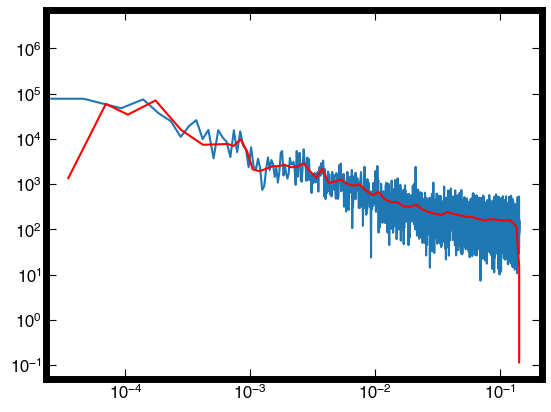

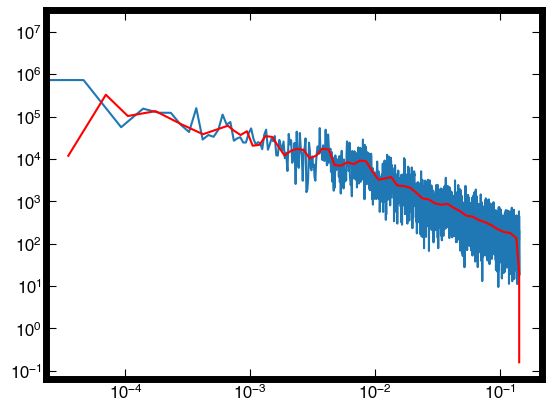

In [10]:
### calculate spectra for each period]
use1 = np.logical_and(df.Time >= pd.Timestamp('2023-03-16 12:00'), df.Time <= pd.Timestamp('2023-03-16 18:00:00'))
use2 = np.logical_and(df.Time >= pd.Timestamp('2023-03-16 18:00:00'), df.Time <= pd.Timestamp('2023-03-17 00:00:03'))
use3 = np.logical_and(df.Time >= pd.Timestamp('2023-03-17 00:00'), df.Time <= pd.Timestamp('2023-03-17 06:00:00'))
 
psd, psd_nm, freq, morlet_psd, morlet_freq, power =  [],[], [], [], [], [] # fourier_psd, fourier_freq

for turb in [[Zpr, Zpt, Zpn], [Zmr, Zmt, Zmn], [dvr, dvt, dvn], [dbr, dbt, dbn]]:
    for use in [use1, use2, use3]:
        Wx, Wy, Wz, Wmod, freqs, PSD, PSD_nm, PSD_mod, scales = trace_PSD_cwt_ssqueezepy(turb[0][use], turb[1][use], turb[2][use], 3.5, 
                                                                                         nv=6, est_mod=True)
        morlet_psd.append(PSD)
        psd_nm.append(PSD_nm)
        morlet_freq.append(freqs)
        f, p = TracePSD(turb[0][use], turb[1][use], turb[2][use], 3.5)
        psd.append(p)
        freq.append(f)
        
#### PSD LIST: Zp (use1, use2, use3), Zm (), dv, db
plt.figure()
plt.loglog(freq[3], psd[3])
plt.loglog(morlet_freq[3], morlet_psd[3], c='red')
# plt.loglog(fourier_freq[3], fourier_psd[3])
plt.figure()
plt.loglog(freq[6], psd[6])
plt.loglog(morlet_freq[6], morlet_psd[6], c='red')
# plt.loglog(fourier_freq[6], fourier_psd[6])
# plt.loglog(fourier_freq[6], power[6], c='k')


In [11]:
### FIT SPECTRA FOR EACH PERIOD
fits, insitu = [], []
# Initial guesses for the parameters
initial_Cp_guess = 5e-3
initial_shared_Cinf_guess = 2.4e-4
initial_Cm_guess = 1e-4
initial_kt_guess = 1e-4

psd_fit = psd
freq_fit = freq
for i, use in enumerate([use1, use2, use3]):
    
    ### MEAN VALUES
    u0 = np.nanmean(df.vr[use])
    vA0 = np.nanmean(df.vA[use])
    ang = np.nanmean(df.angle_vb[use])*u.deg
    print('Mean solar wind and Alfven speed and angle:', u0, vA0, (ang))
    insitu.append([u0, vA0, ang])
    ### CALCULATE WAVE NUMBER 
    f = freq_fit[i]
    kp = (2 * np.pi * f)/(np.abs(u0 * np.cos(ang) - vA0))
    km = (2 * np.pi * f)/(np.abs(u0 * np.cos(ang) + vA0))

    ### CALCULATE POWER SPECTRA OF K+ AND K-
    
    ### CREATE DATAFRAME
    data = {'freq': f, 'kp': kp, 'km': km}
    dfk = pd.DataFrame(data=data)
    
    ### PSD
    # psd_kp = windowed_psd(dfk.kp)
    # psd_km = windowed_psd(dfk.km)

    # ### PLOT
    # plt.plot(psd_kp.freq, psd_kp.power, label='plus')
    # plt.plot(psd_km.freq, psd_km.power, label='minus')
    # plt.xscale('log')
    # plt.yscale('log')
    # len(psd_kp.power)
    # plt.legend()

    # Set bounds for the parameters
    # Set bounds for the parameters
    parameter_bounds1 = ([0, 0], [1e0, 1e0])  
    parameter_bounds2 = ([0, 0, 3e-5], [1e-1, 1e-1, 1e-1])  
    
    # For equation1, use initial_shared_Cinf_guess for Cinf and set bounds
    use = np.logical_and(freq_fit[i]>2e-3, freq_fit[i]<2e-2)
    paramsp, covariance1 = curve_fit(fit_function_p, dfk.kp[use], psd_fit[i][use], p0=[initial_Cp_guess, initial_shared_Cinf_guess], bounds=parameter_bounds1)
    
    # For equation2, use initial_shared_Cinf_guess for Cinf and set bounds
    paramsm, covariance2 = curve_fit(fit_function_m, dfk.km[use], psd_fit[i+3][use], p0=[initial_Cm_guess, initial_shared_Cinf_guess, initial_kt_guess], bounds=parameter_bounds2)
    
    # Extract the optimized parameters
    Cp, Cinf = paramsp
    Cm, Cinf, kt = paramsm
    
    # Calculate ft
    ft = (kt / (2*np.pi)) * (np.abs(u0 * np.cos(np.nanmean(ang)) + np.nanmean(vA0)))
    fits.append([Cp, Cinf, Cm, kt, ft])

    # Print the results as a table in scientific notation
    results_table = tabulate([
        ["Cp", f"{Cp:.4e}"],
        ["Cinf", f"{Cinf:.4e}"],
        ["Cm", f"{Cm:.4e}"],
        ["kt", f"{kt:.4e}"],
        ["ft", f"{ft:.4e}"]
    ], headers=["Parameter", "Fitted Value"], tablefmt="pretty")
    print(results_table)


Mean solar wind and Alfven speed and angle: 119.4225366224919 387.13325377965737 153.94884338996764 deg
+-----------+--------------+
| Parameter | Fitted Value |
+-----------+--------------+
|    Cp     |  1.6180e-02  |
|   Cinf    |  4.7388e-14  |
|    Cm     |  7.7379e-04  |
|    kt     |  3.0000e-05  |
|    ft     |  1.3362e-03  |
+-----------+--------------+
Mean solar wind and Alfven speed and angle: 164.61740269018205 1171.356443060041 156.68851321781537 deg
+-----------+--------------+
| Parameter | Fitted Value |
+-----------+--------------+
|    Cp     |  2.8887e-02  |
|   Cinf    |  1.0498e-15  |
|    Cm     |  1.4713e-03  |
|    kt     |  3.0000e-05  |
|    ft     |  4.8710e-03  |
+-----------+--------------+
Mean solar wind and Alfven speed and angle: 256.09481286292277 814.744653771767 150.75990074575174 deg
+-----------+--------------+
| Parameter | Fitted Value |
+-----------+--------------+
|    Cp     |  1.4655e-01  |
|   Cinf    |  7.1971e-14  |
|    Cm     |  8.5895e

# Figure 6: PSD of Elasser Variables & Fluctuations

- Panels (a)/(c): Elasser variable spectra + fits
- Panels (b)/(d): fluctuation spectra 

In [ ]:
### different background average times
[Zpr, Zpt, Zpn], [Zmr, Zmt, Zmn], [dvr, dvt, dvn], [dbr, dbt, dbn] = sigma.calc_components(df, num=341)
psd20, freq20 = [], []
for turb in [[Zpr, Zpt, Zpn], [Zmr, Zmt, Zmn], [dvr, dvt, dvn], [dbr, dbt, dbn]]:
    for use in [use1, use2, use3]:
        Wx, Wy, Wz, Wmod, freqs, PSD, PSD_mod, scales = trace_PSD_cwt_ssqueezepy(turb[0][use], turb[1][use], turb[2][use], 3.5, est_mod=True)
        psd20.append(PSD)
        freq20.append(freqs)
[Zpr, Zpt, Zpn], [Zmr, Zmt, Zmn], [dvr, dvt, dvn], [dbr, dbt, dbn] = sigma.calc_components(df, num=171)
psd10, freq10 = [], []
for turb in [[Zpr, Zpt, Zpn], [Zmr, Zmt, Zmn], [dvr, dvt, dvn], [dbr, dbt, dbn]]:
    for use in [use1, use2, use3]:
        Wx, Wy, Wz, Wmod, freqs, PSD, PSD_mod, scales = trace_PSD_cwt_ssqueezepy(turb[0][use], turb[1][use], turb[2][use], 3.5, est_mod=True)
        psd10.append(PSD)
        freq10.append(freqs)

In [12]:
### only plot within good range
# psd = morlet_psd
# freq = morlet_freq
psdd = psd.copy()
freqq = freq.copy()
psd, freq = [], []
for pp, ff in zip(psdd, freqq):
    good = np.logical_and(ff>1e-5, ff<1e-1)
    psd.append(pp[good])
    freq.append(ff[good])

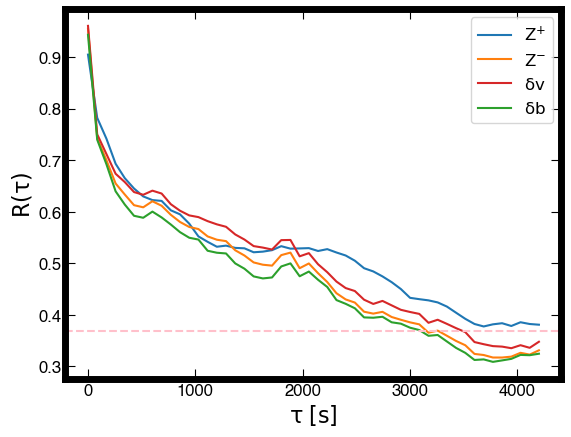

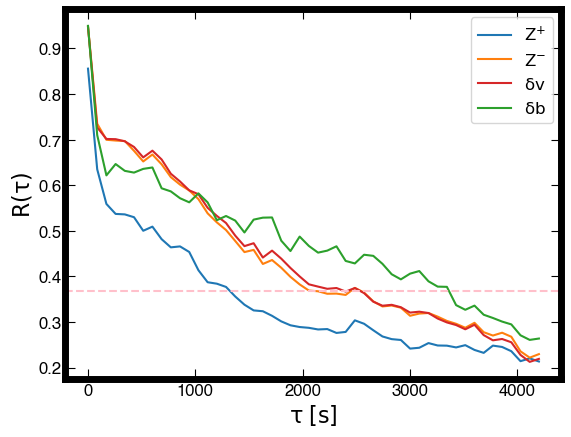

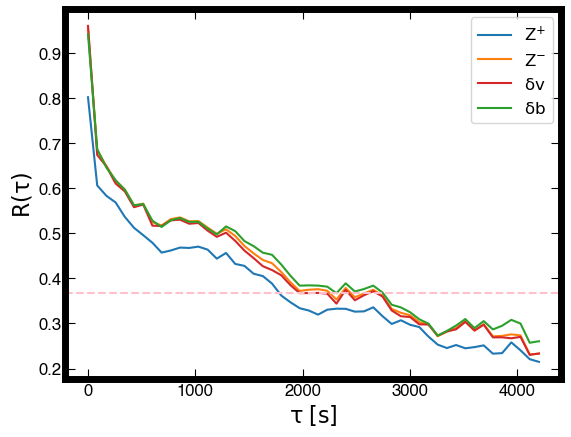

In [22]:
### TESTING CORRELATION TIME SCALE
### C(tau) = 1/N sum(Z(t) * Z(t + tau))

def correlation_time(Z, ii):
    N = len(Z)
    C = [Z[i] * Z[i+ii] for i in np.arange(0, N-ii)]
    C = np.nansum(C) / N
    R = np.nansum(Z*Z) / N
    return C, R

# corr_zp, corr_zm, corr_dv, corr_db = [], [], [], []
# for ii in np.linspace(1, 3000):
#     C, R = correlation_time(np.array(t1.Zp), int(ii))
#     corr_zm.append(C/R)
#     C, R = correlation_time(np.array(t1.Zm), int(ii))
#     corr_zp.append(C/R)
#     C, R = correlation_time(np.array(t1.deltav), int(ii))
#     corr_dv.append(C/R)
#     C, R = correlation_time(np.array(t1.deltab), int(ii))
#     corr_db.append(C/R)
# plt.plot(np.linspace(1, 1200)*3.5, corr_zp, c='tab:blue', label=r'$\rm Z^{+}$')
# plt.plot(np.linspace(1, 1200)*3.5, corr_zm, c='tab:orange', label=r'$\rm Z^{-}$')
# plt.plot(np.linspace(1, 1200)*3.5, corr_dv, c='tab:red', label=r'$\rm \delta v$')
# plt.plot(np.linspace(1, 1200)*3.5, corr_db, c='tab:green', label=r'$\rm \delta b$')
# plt.xlabel(r'$\rm \tau \; [s]$', fontsize=16)
# plt.ylabel(r'$\rm R(\tau)$', fontsize=16)
# plt.legend()
# plt.axhline(1/np.e, c='pink', linestyle='dashed')


for use in [t1, t2, t3]:
    corr_zp, corr_zm, corr_dv, corr_db = [], [], [], []
    for ii in np.linspace(1, 3000):
        C, R = correlation_time(np.array(use.Zp), int(ii))
        corr_zm.append(C/R)
        C, R = correlation_time(np.array(use.Zm), int(ii))
        corr_zp.append(C/R)
        C, R = correlation_time(np.array(use.deltav), int(ii))
        corr_dv.append(C/R)
        C, R = correlation_time(np.array(use.deltab), int(ii))
        corr_db.append(C/R)
    plt.figure()
    plt.plot(np.linspace(1, 1200)*3.5, corr_zp, c='tab:blue', label=r'$\rm Z^{+}$')
    plt.plot(np.linspace(1, 1200)*3.5, corr_zm, c='tab:orange', label=r'$\rm Z^{-}$')
    plt.plot(np.linspace(1, 1200)*3.5, corr_dv, c='tab:red', label=r'$\rm \delta v$')
    plt.plot(np.linspace(1, 1200)*3.5, corr_db, c='tab:green', label=r'$\rm \delta b$')
    plt.xlabel(r'$\rm \tau \; [s]$', fontsize=16)
    plt.ylabel(r'$\rm R(\tau)$', fontsize=16)
    plt.legend()
    plt.axhline(1/np.e, c='pink', linestyle='dashed')
            

Power Law Exponent: -1.13
Power Law Exponent: -1.11
Power Law Exponent: -1.11
Power Law Exponent: -0.96
Power Law Exponent: -0.86
Power Law Exponent: -0.82
Power Law Exponent: -1.13
Power Law Exponent: -1.09
Power Law Exponent: -1.14
Power Law Exponent: -1.12
Power Law Exponent: -1.21
Power Law Exponent: -1.04


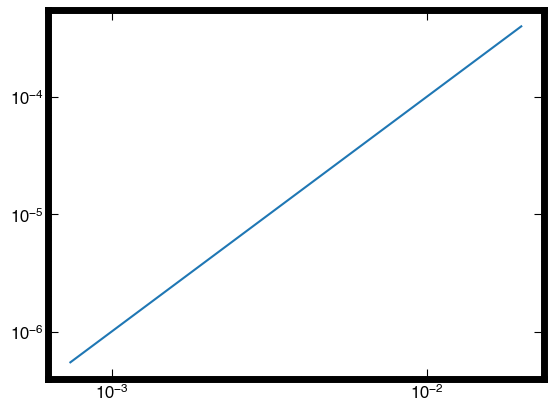

In [23]:
# FT1 = 2.8e-4
FT1 = 3e-4
u1h = np.logical_and(freq[0]>3e-5, freq[0]<FT1)
u1l = np.logical_and(freq[0]>FT1, freq[0]<1e-1)
u1lm = np.logical_and(freq[0]>1e-3, freq[0]<2e-2)

FT2 = 8e-4
u2h = np.logical_and(freq[1]>3e-5, freq[1]<FT2)
u2l = np.logical_and(freq[1]>FT2, freq[1]<1e-1)
u2lm = np.logical_and(freq[1]>1e-3, freq[1]<2e-2)

FT3 =6e-4 # FT1
u3h = np.logical_and(freq[1]>3e-5, freq[1]<FT3)
u3l = np.logical_and(freq[1]>FT3, freq[1]<1e-1)

### FIT SLOPES OF EACH SPECTRA
expon, inter = [], []
for pp, ff in zip(psd, freq):
    use = np.logical_and(freq[0]>3e-4, freq[0]<3e-2)
    ex, ii = fit_slope(ff[use], pp[use])
    expon.append(ex)
    inter.append(ii)

use = np.logical_and(freq[0]>7e-4, freq[0]<2e-2)
ff = freq[0][use]
plt.loglog(ff, ff**2)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


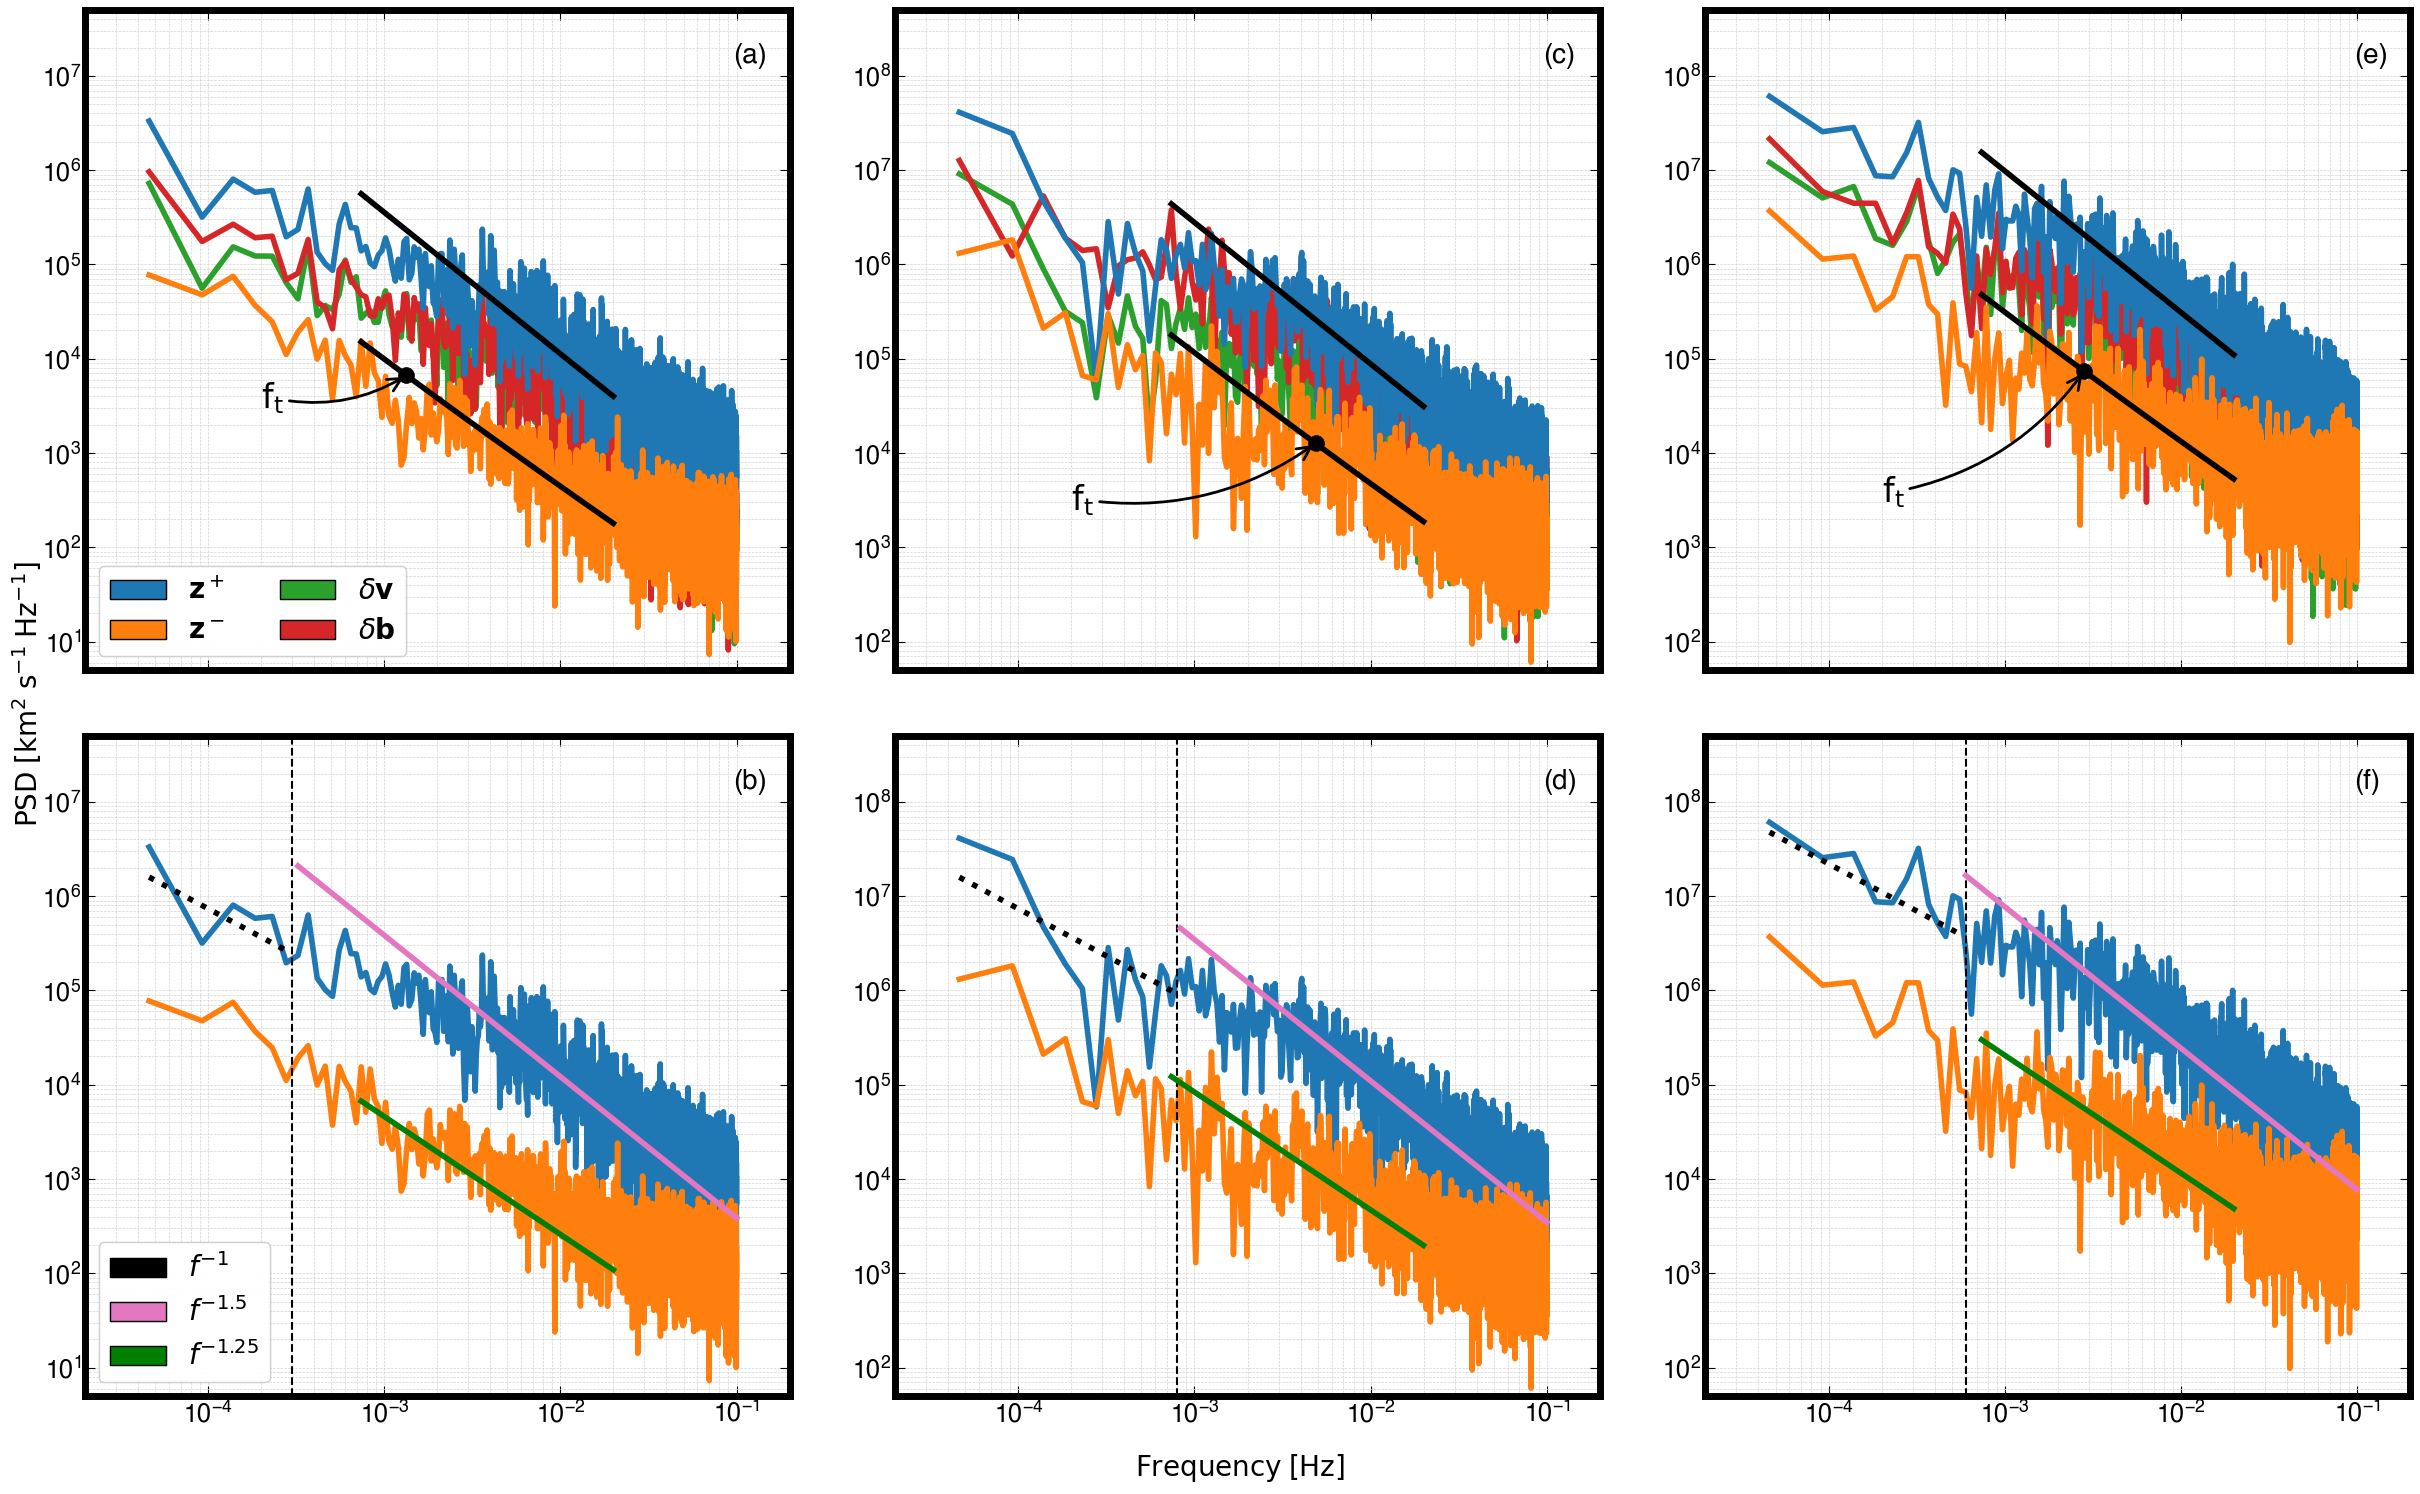

In [25]:
# psd = morlet_psd
# freq = morlet_freq

# Plot the PSD
fig, axs = plt.subplots(2, 3, figsize=[30, 18], sharex='col', sharey='col', gridspec_kw={'wspace':0.15, 'hspace':0.10})

colors = ['tab:green', 'tab:red', 'tab:blue', 'tab:orange', 'tab:purple', 'tab:olive']
labels=[r'$\delta \mathbf{v}$', r'$\delta \mathbf{b}$', r'$\mathbf{z}^+$', r'$\mathbf{z}^-$']
lw, lws = 4, 4
ch, cl, clm, clmh = ['k', 'tab:pink', 'green', 'crimson']
zpc, zmc = ['k', 'k'] # slateblue
### ------------------------------------------------------- ###
            ##### -------- INTERVAL ONE -------- #####
### ------------------------------------------------------- ###

##### -------- PANEL ONE: ELASSER SPECTRA -------- #####
ax = axs[0][0]
ax.set(xlim=(2e-5,2e-1), xticks=[1e-4, 1e-3, 1e-2, 1e-1], ylim=(5e0, 5e7), yticks=[1e1, 1e3, 1e5, 1e7])
for i, [pp, f] in enumerate(zip([psd[6], psd[9], psd[0], psd[3]], [freq[6], freq[9], freq[0], freq[3]])):
    ax.plot(f, pp, c=colors[i], label=labels[i], linewidth=lw)

### PLOT FITS
Cp, Cinf, Cm, kt, ft = fits[0]
u0, vA0, ang = insitu[0]
kp = (2 * np.pi * ff)/(np.abs(u0 * np.cos(ang) - vA0))
y1 = fit_function_p(kp, Cp, Cinf) 
ax.plot(ff, y1, c=zpc, lw=lws, zorder=2) 

km = (2 * np.pi * ff)/(np.abs(u0 * np.cos(ang) + vA0))
y2 = fit_function_m(km, Cm, Cinf, kt)
ax.plot(ff, y2, c=zmc, lw=lws, zorder=2)  

### THRESHOLD FREQUENCY
ax.scatter(ft, fit_function_m(kt, Cm, Cinf, kt), s=130, c='k', edgecolor='k', lw=0.5, zorder=3)
ax.annotate(r'$\rm f_t$',  xy=(ft, fit_function_m(kt, Cm, Cinf, kt)-0.5), xytext=(2e-4, 3000),
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.2', linewidth=2),fontsize=24)

### LEGEND ###
zp_patch = mpatches.Patch(edgecolor='k', facecolor=colors[0], label=labels[0])
zm_patch = mpatches.Patch(edgecolor='k', facecolor=colors[1], label=labels[1])
dv_patch = mpatches.Patch(edgecolor='k', facecolor=colors[2], label=labels[2])
db_patch = mpatches.Patch(edgecolor='k', facecolor=colors[3], label=labels[3])
leg0 = ax.legend(handles=[dv_patch, db_patch, zp_patch, zm_patch], loc='lower left', fontsize=20, ncol=2)
ax.add_artist(leg0)

### ADD PANEL LABELS
ax.text(0.92, 0.95, '(a)', transform=ax.transAxes, fontsize=20, fontweight='bold', va='top', ha='left')
ax.tick_params(axis='both', which='major', labelsize=18) 
ax.set_xscale('log')  
ax.set_yscale('log')
ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='lightgray')

##### -------- PANEL TWO: SPECTRAL FITS -------- #####
ax = axs[1][0]
for i, [pp, f] in enumerate(zip([psd[0], psd[3]], [freq[0], freq[3]])):
    ax.plot(f, pp, c=colors[i+2], label=labels[i+2], linewidth=lw)

### SLOPE FITS4, 2.2, -0.7
ax.plot(f[u1h], np.exp(4.3)*(f[u1h]**-1), c=ch, zorder=10, lw=lws, linestyle='dotted')
ax.plot(f[u1l], np.exp(2.5)*(f[u1l]**-1.5), c=cl,  zorder=10, lw=lws)
ax.plot(ff, np.exp(-0.2)*(ff**-1.25), c=clm, zorder=10, lw=lws)

ax.axvline(FT1, c='k', linestyle='dashed')

### LEGEND ###
zp_patch = mpatches.Patch(edgecolor='k', facecolor=ch, label=f'$f^{{-1}}$')
zm_patch = mpatches.Patch(edgecolor='k', facecolor=cl, label=f'$f^{{-1.5}}$')
db_patch = mpatches.Patch(edgecolor='k', facecolor=clm, label=f'$f^{{-1.25}}$')
leg0 = ax.legend(handles=[zp_patch, zm_patch, db_patch], loc='lower left', fontsize=20)
ax.add_artist(leg0)

### LABELS
ax.text(0.92, 0.95, '(b)', transform=ax.transAxes, fontsize=20, fontweight='bold', va='top', ha='left')
ax.tick_params(axis='both', which='major', labelsize=18) 

### SCALES
ax.set_xscale('log')  
ax.set_yscale('log')
ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='lightgray', zorder=-4)

## ------------------------------------------------------- ###
            ##### -------- INTERVAL TWO -------- #####
### ------------------------------------------------------- ###

##### -------- PANEL THREE: ELASSER SPECTRA (P2) -------- #####
ax = axs[0][1]
ax.set(xlim=(2e-5,2e-1), xticks=[1e-4, 1e-3, 1e-2, 1e-1], ylim=(5e1, 5e8), yticks=[1e2, 1e4, 1e6, 1e8])
for i, [pp, f] in enumerate(zip([psd[7], psd[10], psd[1], psd[4]], [freq[7], freq[10], freq[1], freq[4]])):
    ax.plot(f, pp, c=colors[i], label=labels[i], linewidth=lw)
### PLOT FITS
Cp, Cinf, Cm, kt, ft = fits[1]
u0, vA0, ang = insitu[1]
kp = (2 * np.pi * ff)/(np.abs(u0 * np.cos(ang) - vA0))
y1 = fit_function_p(kp, Cp, Cinf) 
ax.plot(ff, y1, c=zpc, lw=lws, zorder=2) 

km = (2 * np.pi * ff)/(np.abs(u0 * np.cos(ang) + vA0))
y2 = fit_function_m(km, Cm, Cinf, kt)
ax.plot(ff, y2, c=zmc, lw=lws, zorder=2)  

### THRESHOLD FREQUENCY
ax.scatter(ft, fit_function_m(kt, Cm, Cinf, kt), s=130, c='k', edgecolor='k', lw=0.5, zorder=3)
ax.annotate(r'$\rm f_t$',  xy=(ft, fit_function_m(kt, Cm, Cinf, kt)-0.5), xytext=(2e-4, 2500),
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.2', linewidth=2),fontsize=24)

### ADD PANEL LABELS
ax.text(0.92, 0.95, '(c)', transform=ax.transAxes, fontsize=20, fontweight='bold', va='top', ha='left')
ax.tick_params(axis='both', which='major', labelsize=18) 
ax.set_xscale('log')  
ax.set_yscale('log')
ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='lightgray')

##### -------- PANEL FOUR: SPECTRAL FITS (P2) -------- #####
ax = axs[1][1]
for i, [pp, f] in enumerate(zip([psd[1], psd[4]], 
                                [freq[1], freq[4]])):
    ax.plot(f, pp, c=colors[i+2], linewidth=lw)

# ### SLOPE FITS
ax.plot(ff, np.exp(2.7)*(ff**-1.25), c=clm, label=f'$f^{-1.25}$', zorder=10, lw=lws)
ax.plot(f[u2h], np.exp(6.6)*(f[u2h]**-1), c=ch, label=f'$f^{{{-1}}}$', zorder=10, lw=lws, linestyle='dotted')
ax.plot(f[u2l], np.exp(4.7)*(f[u2l]**-1.5), c=cl, label=f'$f^{{{-1.5}}}$', zorder=10, lw=lws)
ax.axvline(FT2, c='k', linestyle='dashed')

### LABELS
ax.text(0.92, 0.95, '(d)', transform=ax.transAxes, fontsize=20, fontweight='bold', va='top', ha='left')
ax.tick_params(axis='both', which='major', labelsize=18) 

### SCALES
ax.set_xscale('log')  
ax.set_yscale('log')
ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='lightgray', zorder=-4)


### ------------------------------------------------------- ###
            ##### -------- INTERVAL THREE -------- #####
### ------------------------------------------------------- ###

##### -------- PANEL THREE: ELASSER SPECTRA (P2) -------- #####
ax = axs[0][2]
ax.set(xlim=(2e-5,2e-1), xticks=[1e-4, 1e-3, 1e-2, 1e-1], ylim=(5e1, 5e8), yticks=[1e2, 1e4, 1e6, 1e8])
for i, [pp, f] in enumerate(zip([psd[8], psd[11], psd[2], psd[5]], [freq[8], freq[11], freq[2], freq[5]])):
    ax.plot(f, pp, c=colors[i], label=labels[i], linewidth=lw)
    
# [ax.plot(freqq[7], gg, c='k', zorder=-1) for gg in (np.abs(Wx)**2 + np.abs(Wy)**2 + np.abs(Wz)**2)*(2*3/5)]
# gg = (np.abs(Wx)**2 + np.abs(Wy)**2 + np.abs(Wz)**2)*(2*3/5)
# ax.plot(freqq[7], gg, c='k', zorder=-1)

### PLOT FITS
Cp, Cinf, Cm, kt, ft = fits[2]
u0, vA0, ang = insitu[2]
kp = (2 * np.pi * ff)/(np.abs(u0 * np.cos(ang) - vA0))
y1 = fit_function_p(kp, Cp, Cinf) 
ax.plot(ff, y1, c=zpc, lw=lws, zorder=2) 

km = (2 * np.pi * ff)/(np.abs(u0 * np.cos(ang) + vA0))
y2 = fit_function_m(km, Cm, Cinf, kt)
ax.plot(ff, y2, c=zmc, lw=lws, zorder=2)  

### THRESHOLD FREQUENCY
ax.scatter(ft, fit_function_m(kt, Cm, Cinf, kt), s=130, c='k', edgecolor='k', lw=0.5, zorder=3)
ax.annotate(r'$\rm f_t$',  xy=(ft, fit_function_m(kt, Cm, Cinf, kt)-0.5), xytext=(2e-4, 3000),
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.2', linewidth=2),fontsize=24)

### ADD PANEL LABELS
ax.text(0.92, 0.95, '(e)', transform=ax.transAxes, fontsize=20, fontweight='bold', va='top', ha='left')
ax.tick_params(axis='both', which='major', labelsize=18) 
ax.set_xscale('log')  
ax.set_yscale('log')
ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='lightgray')

##### -------- PANEL FOUR: SPECTRAL FITS (P2) -------- #####
ax = axs[1][2]
for i,  [pp, f] in enumerate(zip([psd[2], psd[5]], [freq[2], freq[5]])):
    ax.plot(f, pp, c=colors[i+2], label=labels[i+2], linewidth=lw, zorder=1)

### SLOPE FITS
ax.plot(ff, np.exp(3.6)*(ff**-1.25), c=clm, label=f'$f^{{{-1.25}}}$', zorder=10, lw=lws)
ax.plot(f[u3h], np.exp(7.7)*(f[u3h]**-1), c=ch, label=f'$f^{{{-1}}}$', zorder=10, lw=lws, linestyle='dotted')
ax.plot(f[u3l], np.exp(5.5)*(f[u3l]**-1.5), c=cl, label=f'$f^{{{-1.5}}}$', zorder=10, lw=lws)
ax.axvline(FT3, c='k', linestyle='dashed')


### LABELS
ax.text(0.92, 0.95, '(f)', transform=ax.transAxes, fontsize=20, fontweight='bold', va='top', ha='left')
ax.tick_params(axis='both', which='major', labelsize=18) 

### SCALES
ax.set_xscale('log')  
ax.set_yscale('log')
ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='lightgray', zorder=-4)

### ADD PANEL LABELS 
fig.text(0.10, 0.5, r'$\rm PSD \; [km^2 \; s^{-1} \; Hz^{-1}]$', fontsize=20, va='center', rotation='vertical')
fig.text(0.475, 0.07, r'$\rm Frequency \; [Hz]$', fontsize=20, va='center', rotation='horizontal')

### SAVE FIGURE
plt.savefig(os.path.realpath(os.path.join(FIG_DIR, 'fig6.png')), bbox_inches='tight')
plt.savefig(os.path.realpath(os.path.join(EPS_DIR, 'fig6.eps')), bbox_inches='tight')


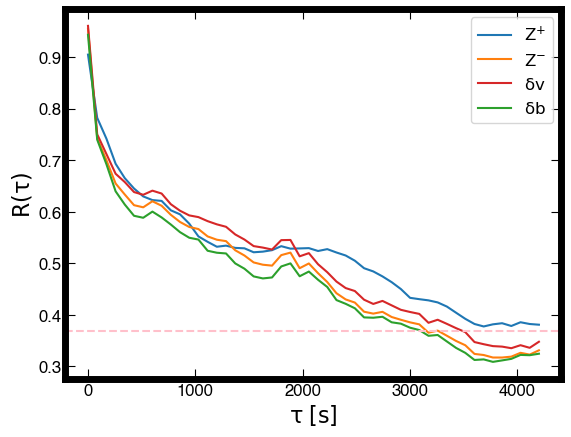

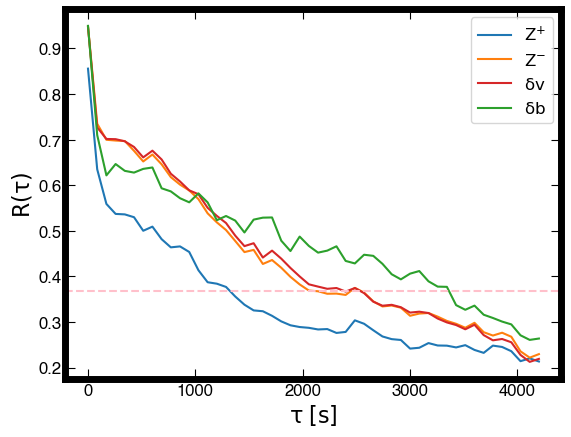

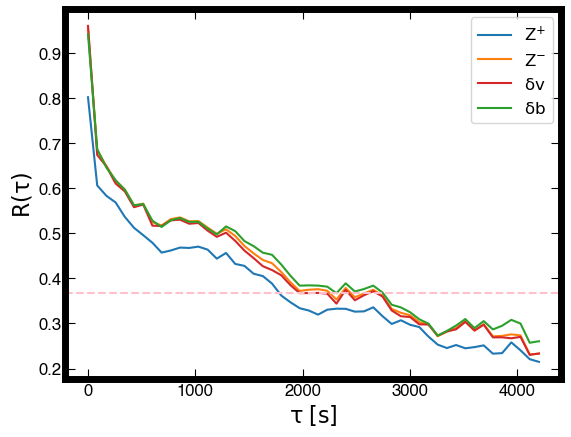

# Noise PSD

In [30]:
### ----- calculate spectra for noise ------ ###
N = 1000 #len(psd_Zp.freq)  # Number of samples
freqs_noise, psd_noise, power, sn, mor_noise, mor_psd = [], [], [], [], [], []
for i, vv in enumerate([2.89, 11.49, 34]): #[5, 20, 50] # 34.64  # 28.87
    speed = 200
    noise_level = vv  # Amplitude of the noise in km/s
    sample_rate = 3.5

    # Generate a constant signal with some noise
    signal = np.ones(N) * speed
    noise = np.random.normal(0, noise_level, N)  # Generate random noise
    x = signal + noise
    noise = np.random.normal(0, noise_level, N)
    y = signal + noise
    noise = np.random.normal(0, noise_level, N)
    z = signal + noise
    data_km_per_s = np.sqrt(x**2 + y**2 +  z**2)
    sn.append(data_km_per_s)
    # xx = fourier_1D(data_km_per_s, sample_rate)
    xx = TracePSD(x, y, z, 3.5)
    _,_, _, _, yyf, yypsd, _, _, _ = trace_PSD_cwt_ssqueezepy(x, y, z, sample_rate)
    # use = np.logical_and(xx[0]>1e-5, xx[0]<1e-1)[0]
    freqs_noise.append(xx[0]) 
    psd_noise.append(xx[1]) 
    mor_noise.append(yyf) 
    mor_psd.append(yypsd) 
    # power.append(xx[2]) 
    # plt.loglog(xx[0][use], xx[1][use])

## Density Noise

In [ ]:
dens = [t1.Np[i*ss:i*ss+ss] for i in range(0, ii)]
dens = windowed_psd(dens)
plt.figure()
plt.loglog(dens.freq, dens.power, c='b', label='v - b')
plt.loglog(refspec_Np[0].freq, refspec_Np[0].power, c='red')

In [ ]:
### ----- calculate spectra for noise ------ ###
N = 500 #len(psd_Zp.freq)  # Number of samples
refspec_Np, sn_Np = [], []
for i, vv in enumerate([np.nanmean(t1.Np) - 100, np.nanmean(t1.Np), np.nanmean(t1.Np) + 100]):
    speed =  np.nanmean(t1.Np)
    noise_level = vv  # Amplitude of the noise in km/s
    sample_rate = 3.5

    # Generate a constant signal with some noise
    signal = np.ones(N) * speed
    noise = np.random.normal(0, noise_level, N)  # Generate random noise
    data_km_per_s = signal + noise
    sn_Np.append(data_km_per_s)
    refspec_Np.append(windowed_psd_noise(data_km_per_s, sample_rate))

## Noise Comparison -- Visual

In [ ]:
# Plot the PSD

fig, [ax2, ax3] = plt.subplots(1, 2, figsize=[20, 6], sharey='all')
colors = ['blue', 'orange', 'green', 'red']
labels=[r'$\mathbf{z}^+$', r'$\mathbf{z}^-$', r'$\delta \mathbf{v}$', r'$\delta \mathbf{b}$']

# ##### NOISE COMPARISON #####
lab = ['5 km/s', '10 km/s', '50 km/s']
col = ['purple', 'gold', 'pink']
# xy=[0, 50, 100]
# for i, xx in enumerate(sn):
#     ax1.plot(xx+xy[i], c=col[i], label=lab[i])

# ax1.set_ylabel('Offset 50 km/s between each')
# ax1.set_title('Noise Comparisons')
# ax1.legend()

##### SPECTRA #####
freq = psd_Zp.freq
for i, psd_spec in enumerate([psd_Zp, psd_Zm, psd_dv, psd_db]):
    ax2.plot(psd_spec.freq, psd_spec.power, c=colors[i], label=labels[i], linewidth=1)

ax2.legend(loc='upper right')
ax2.set_title('Power Spectral Density (PSD)')
ax2.set_xlabel('Frequency (Hz)')
ax2.set_xscale('log')  
ax2.set_yscale('log')
ax2.grid(True)

##### NOISE + SPECTRA #####
for i, psd_spec in enumerate([psd_Zp, psd_Zm, psd_dv, psd_db]):
    ax3.plot(psd_spec.freq, psd_spec.power, c=colors[i], label=labels[i], linewidth=1)
ax3.plot(refspec[0].freq, refspec[0].power, label='1 km/s', color=col[0])
ax3.plot(refspec[1].freq, refspec[1].power, label='3 km/s', color=col[1])
ax3.plot(refspec[2].freq, refspec[2].power, label='6 km/s', color=col[2])
ax3.legend(loc='upper right')
ax3.set_title('Velocity Power Spectral Density (PSD)')
ax3.set_xlabel('Frequency (Hz)')
ax3.set_ylabel('PSD')  
ax3.set_xscale('log')  
ax3.set_yscale('log')
ax3.grid(True)
# plt.savefig('PSD.png')


plt.suptitle('Encounter 15 Turbulence Properties')
plt.show()

# Appendix B: Figure 10 

- Panel (a): Timeseries of offset values
- Panel (b): PSD plot of noise measurements (log/log)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


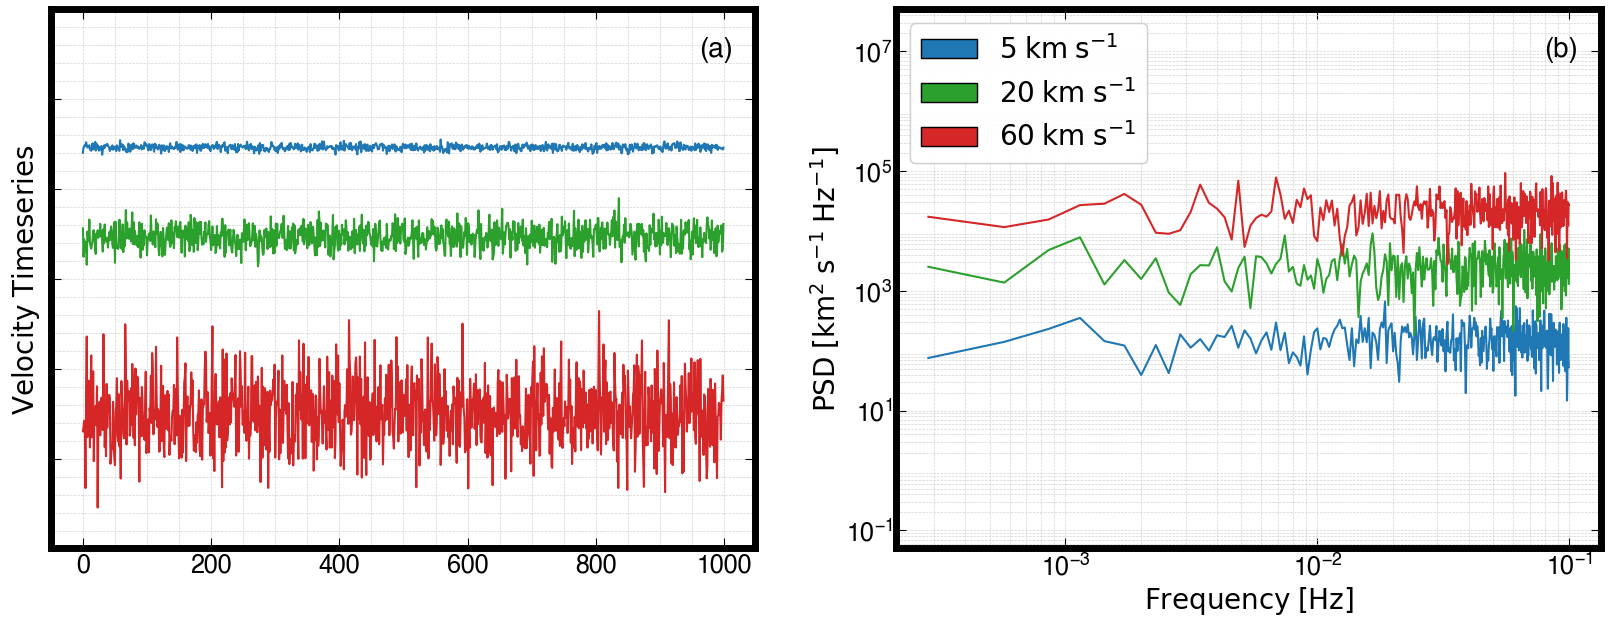

In [31]:
fnoise = freqs_noise
# psd_noise = mor_psd
# Plot the PSD
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=[20, 7])

labels=[r'$\mathbf{z}^+$', r'$\mathbf{z}^-$', r'$\delta \mathbf{v}$', r'$\delta \mathbf{b}$']

##### NOISE COMPARISON #####
ax = ax1
# lab = [r'$\rm 1 \; km \; s^{-1}$', r'$\rm 3 \; km \; s^{-1}$', r'$\rm 5 \; km \; s^{-1}$']

lab = [r'$\rm 5 \; km \; s^{-1}$', r'$\rm 20 \; km \; s^{-1}$', r'$\rm 60 \; km \; s^{-1}$']
col = ['tab:blue', 'tab:green', 'tab:red']
xy=[-200, -300, -500]
for i, xx in enumerate(sn):
    ax1.plot(xx+xy[i], c=col[i], label=lab[i])

### ADD PANEL LABELS
ax.text(0.92, 0.95, '(a)', transform=ax.transAxes, fontsize=20, fontweight='bold', va='top', ha='left')
ax.set_ylabel(r'$\rm Velocity \; Timeseries$', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=18) 
ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='lightgray')
ax.set(ylim=(-300, 300), yticklabels=[])

##### SPECTRA #####
ax = ax2
use = np.logical_and(fnoise[0] < 1e-1, fnoise[0]>1e-5)
ax.plot(fnoise[0][use], psd_noise[0][use], label=r'$\rm 5 \; km \; s^{-1}$', color=col[0])
ax.plot(fnoise[1][use], psd_noise[1][use], label=r'$\rm 20 \; km \; s^{-1}$', color=col[1])
ax.plot(fnoise[2][use], psd_noise[2][use], label=r'$\rm 60 \; km \; s^{-1}$', color=col[2])

### ADD PANEL LABELS
ax.text(0.92, 0.95, '(b)', transform=ax.transAxes, fontsize=20, fontweight='bold', va='top', ha='left')
ax.set_xlabel(r'$\rm Frequency \; [Hz]$', fontsize=20)
ax.set_ylabel(r'$\rm PSD \; [km^2 \; s^{-1} \; Hz^{-1}]$', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=18) 
ax.set_xscale('log')  
ax.set_yscale('log') 
ax.set_ylim(5e-2, 5e7) 
ax.set_yticks([1e-1, 1e1, 1e3, 1e5, 1e7])
ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='lightgray')

### LEGEND
R_patch = mpatches.Patch(label=r'$\rm 5 \; km \; s^{-1}$', edgecolor='k', facecolor=col[0])
T_patch = mpatches.Patch(label=r'$\rm 20 \; km \; s^{-1}$', edgecolor='k', facecolor=col[1])
N_patch = mpatches.Patch(label=r'$\rm 60 \; km \; s^{-1}$', edgecolor='k', facecolor=col[2])
leg0 = ax.legend(handles=[R_patch, T_patch, N_patch], loc='upper left', fontsize=20)
ax.add_artist(leg0)

### SAVE FIGURE
plt.savefig(os.path.join(FIG_DIR, 'fig13.png'), bbox_inches='tight')
plt.savefig(os.path.join(EPS_DIR, 'fig13.eps'), bbox_inches='tight')


# Appendix B: Figure 11
- Comparison between each spectral PSD and noise level for both periods

- Row One: first E15 sub-Alfvenic portion
- Row Two: second E15 sub-Alfvenic portion

## Final Figure

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


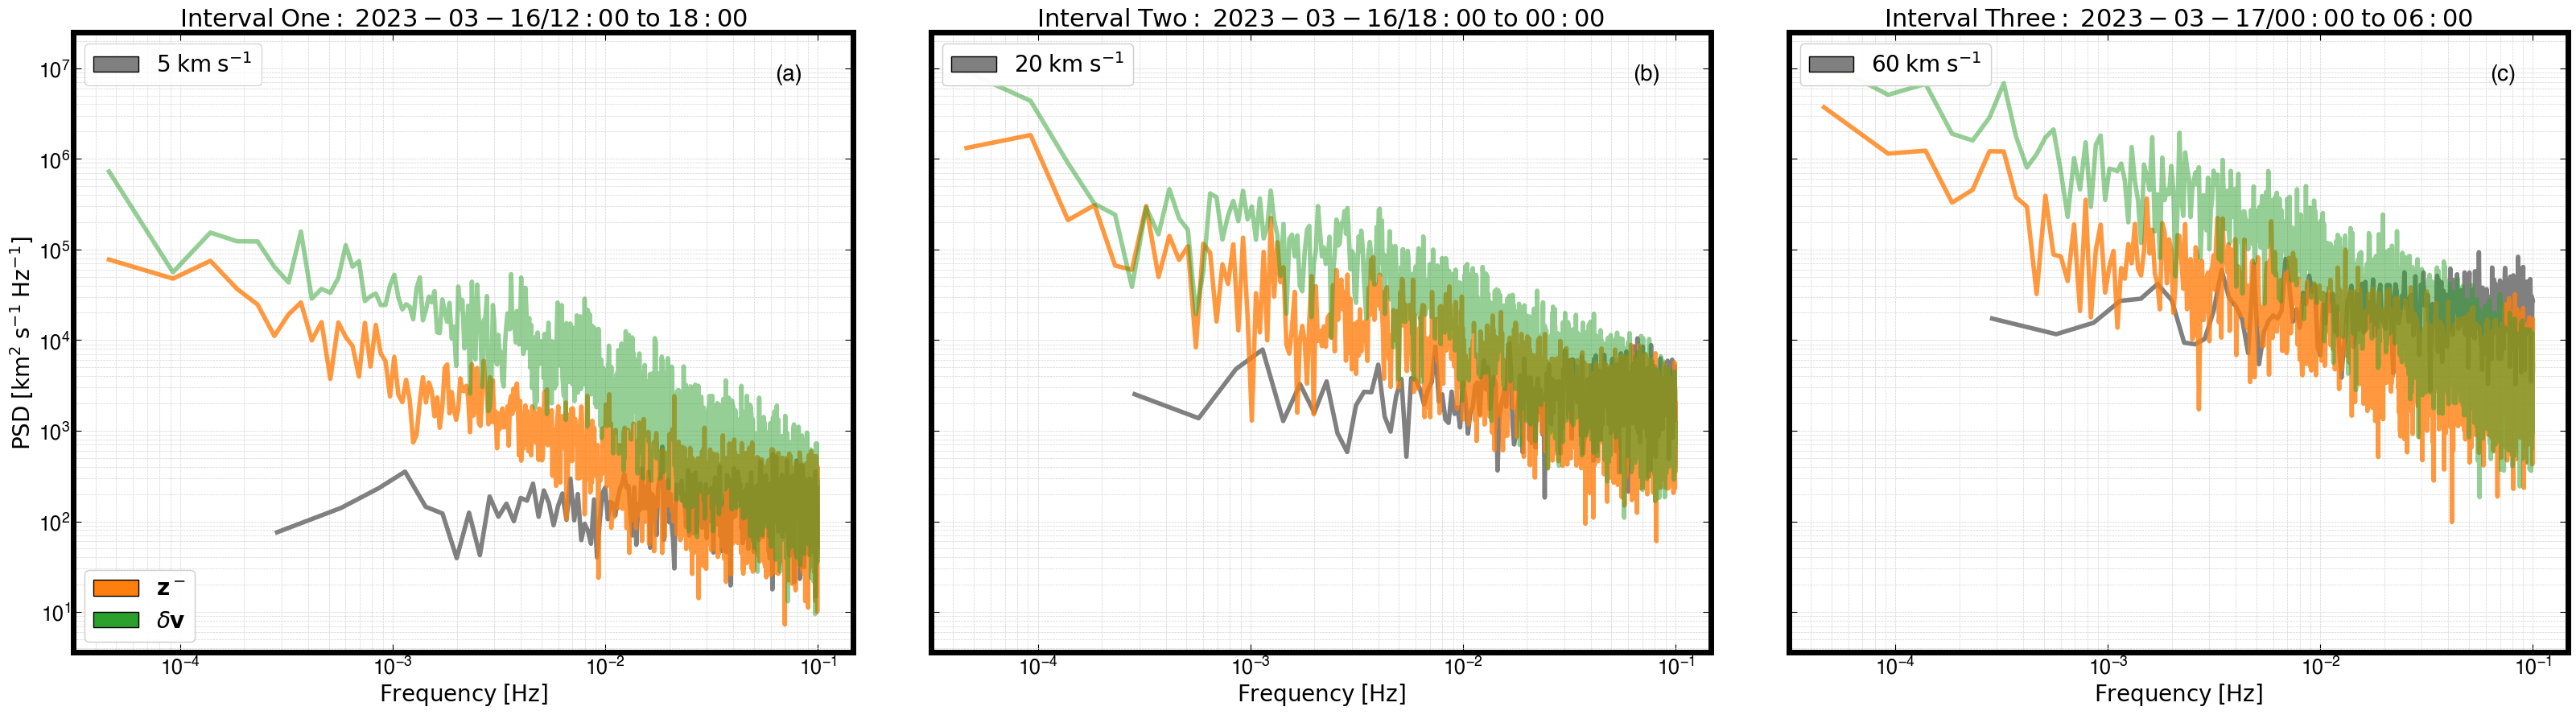

In [33]:
# freqs_noise = mor_noise
# psd_noise = mor_psd

# Plot the PSD
lw, gg = 4, 'gray'
fig, axs = plt.subplots(1, 3, figsize=[40, 10], sharex='all',  sharey='all', gridspec_kw={'wspace':0.1, 'hspace':0.18})
col = ['tab:blue', 'tab:orange', 'tab:red']

# labels=[r'$\mathbf{z}^+$', r'$\mathbf{z}^-$', r'$\delta \mathbf{v}$', r'$\delta \mathbf{b}$']
labels = [r'$\rm Interval \; One: \; 2023-03-16/12:00 \; to \; 18:00$', 
          r'$\rm Interval \; Two: \; 2023-03-16/18:00 \; to \; 00:00$',
          r'$\rm Interval \; Three: \; 2023-03-17/00:00 \; to \; 06:00$']

##### ----- FAKE SPECTRA - PERIOD ONE ---- #####
panels = ['(a)', '(b)', '(c)']
use = np.logical_and(freqs_noise[0] < 1e-1, freqs_noise[0]>1e-5)
for i, ax in enumerate(axs):
    # ax.plot(freqs_noise[0][use], psd_noise[0][use], label=r'$\rm 5 \; km \; s^{-1}$', linewidth=lw, color=col[0])
    # ax.plot(freqs_noise[1][use], psd_noise[1][use], label=r'$\rm 25 \; km \; s^{-1}$', linewidth=lw, color=col[1])
    # ax.plot(freqs_noise[2][use], psd_noise[2][use], label=r'$\rm 60 \; km \; s^{-1}$', linewidth=lw, color=col[2])
    ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='lightgray')
    ax.tick_params(axis='both', which='major', labelsize=18) 
    ax.text(0.90, 0.95, panels[i], transform=ax.transAxes, fontsize=20, fontweight='bold', va='top', ha='left')
    ax.set_xscale('log')  
    ax.set_yscale('log')  
# axs[0].plot(freqs_noise[0][use], power[0][use], label=r'$\rm 5 \; km \; s^{-1}$', color='gray')
# axs[1].plot(freqs_noise[1][use], power[1][use], label=r'$\rm 25 \; km \; s^{-1}$', color='gray')
# axs[2].plot(freqs_noise[2][use], power[2][use], label=r'$\rm 60 \; km \; s^{-1}$', color='gray')
# use = np.logical_and(mor_noise[0] < 1e-1, mor_noise[0]>1e-5)
# axs[0].plot(mor_noise[0][use], mor_psd[0][use], label=r'$\rm 5 \; km \; s^{-1}$', color='k', lw=lw)
# axs[1].plot(mor_noise[1][use], mor_psd[1][use], label=r'$\rm 25 \; km \; s^{-1}$', color='k', lw=lw)
# axs[2].plot(mor_noise[2][use], mor_psd[2][use], label=r'$\rm 60 \; km \; s^{-1}$', color='k', lw=lw)
use = np.logical_and(freqs_noise[0] < 1e-1, freqs_noise[0]>1e-5)
axs[0].plot(freqs_noise[0][use], psd_noise[0][use], label=r'$\rm 5 \; km \; s^{-1}$', color=gg, lw=lw)
axs[1].plot(freqs_noise[1][use], psd_noise[1][use], label=r'$\rm 20 \; km \; s^{-1}$', color=gg, lw=lw)
axs[2].plot(freqs_noise[2][use], psd_noise[2][use], label=r'$\rm 60 \; km \; s^{-1}$', color=gg, lw=lw)
R_patch = mpatches.Patch(label=r'$\rm 5 \; km \; s^{-1}$',  edgecolor='k', facecolor=gg)
T_patch = mpatches.Patch(label=r'$\rm 20 \; km \; s^{-1}$', edgecolor='k', facecolor=gg)
N_patch = mpatches.Patch(label=r'$\rm 60 \; km \; s^{-1}$', edgecolor='k', facecolor=gg)
leg0 = axs[0].legend(handles=[R_patch], loc='upper left', fontsize=20)
axs[0].add_artist(leg0)
leg0 = axs[1].legend(handles=[T_patch], loc='upper left', fontsize=20)
axs[1].add_artist(leg0)
leg0 = axs[2].legend(handles=[N_patch], loc='upper left', fontsize=20)
axs[2].add_artist(leg0)

##### ------ REAL SPECTRA - PERIOD ONE #####
morlet_psd
# for i, [f, psd_spec, psddv] in enumerate(zip([morlet_freq[3], morlet_freq[4], morlet_freq[5]], 
#                                              [morlet_psd[3], morlet_psd[4], morlet_psd[5]], 
#                                              [morlet_psd[6], morlet_psd[7], morlet_psd[8]])):

for i, [f, psd_spec, psddv] in enumerate(zip([freq[3], freq[4], freq[5]], [psd[3], psd[4], psd[5]], [psd[6], psd[7], psd[8]])):
    axs[i].plot(f, psd_spec, c='tab:orange', linewidth=lw, zorder=4, alpha=0.8)
    axs[i].plot(f, psddv, c='tab:green', linewidth=lw, zorder=4, alpha=0.5)
    axs[i].set_title(labels[i], fontsize=22)
    axs[i].set_xlabel(r'$\rm Frequency \; [Hz]$', fontsize=20)
axs[0].set_ylabel(r'$\rm PSD \; [km^2 \; s^{-1} \; Hz^{-1}]$', fontsize=20)

### ADD PANEL LABELS 
# fig.text(0.09, 0.5, r'$\rm PSD \; [km^2 \; s^{-1} \; Hz^{-1}]$', fontsize=20, va='center', rotation='vertical')
# fig.text(0.475, 0.05, r'$\rm Frequency \; [Hz]$', fontsize=20, va='center', rotation='horizontal')

# ### TITLES
# fig.text(0.5, 0.93, r'$\rm Sub-Alfv\'enic \; Interval \; One: \; 2023-03-16/12:00 \; to \; 18:00$', fontsize=20, ha='center', va='center', rotation='horizontal') # period one
# fig.text(0.5, 0.50, r'$\rm Sub-Alfv\'enic \; Interval \; Two: \; 2023-03-17/00:00 \; to \; 16:00$', fontsize=20, ha='center', va='center', rotation='horizontal') # period two

### LEGEND
# ax = axs[0]
# R_patch = mpatches.Patch(label=r'$\rm 5 \; km \; s^{-1}$',  edgecolor='k', facecolor=col[0])
# T_patch = mpatches.Patch(label=r'$\rm 20 \; km \; s^{-1}$', edgecolor='k', facecolor=col[1])
# N_patch = mpatches.Patch(label=r'$\rm 60 \; km \; s^{-1}$', edgecolor='k', facecolor=col[2])
# leg0 = ax.legend(handles=[R_patch, T_patch, N_patch], loc='upper left', fontsize=20)
# ax.add_artist(leg0)

### LEGEND ###
ax = axs[0]
zm_patch = mpatches.Patch(edgecolor='k', facecolor='tab:orange', label=r'$\mathbf{z}^-$')
# zm_patch = mpatches.Patch(edgecolor='k', facecolor=colors[1], label=labels[1])
dv_patch = mpatches.Patch(edgecolor='k', facecolor='tab:green', label=r'$\delta \mathbf{v}$')
# db_patch = mpatches.Patch(edgecolor='k', facecolor=colors[3], label=labels[3])
leg0 = ax.legend(handles=[zm_patch, dv_patch], loc='lower left', fontsize=20)
ax.add_artist(leg0)


plt.savefig(os.path.join(FIG_DIR, 'fig14.png'), bbox_inches='tight')
plt.savefig(os.path.join(EPS_DIR, 'fig14.eps'), bbox_inches='tight')


## Two Rows

In [ ]:
# Plot the PSD
lw=2
fig, axs = plt.subplots(2, 4, figsize=[30, 12], sharex='all', sharey='row', gridspec_kw={'wspace':0.1, 'hspace':0.18})
col = ['tab:blue', 'tab:green', 'tab:red']

labels=[r'$\mathbf{z}^+$', r'$\mathbf{z}^-$', r'$\delta \mathbf{v}$', r'$\delta \mathbf{b}$']

##### ----- FAKE SPECTRA - PERIOD ONE ---- #####
axx = axs[0]
panels = ['(a)', '(b)', '(c)', '(d)']
for i, ax in enumerate(axx):
    ax.plot(refspec[0].freq, refspec[0].power, label=r'$\rm 1 \; km \; s^{-1}$', color=col[0])
    ax.plot(refspec[1].freq, refspec[1].power, label=r'$\rm 3 \; km \; s^{-1}$', color=col[1])
    ax.plot(refspec[2].freq, refspec[2].power, label=r'$\rm 5 \; km \; s^{-1}$', color=col[2])
    ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='lightgray')
    ax.tick_params(axis='both', which='major', labelsize=18) 
    ax.text(0.90, 0.95, panels[i], transform=ax.transAxes, fontsize=20, fontweight='bold', va='top', ha='left')
    ax.set_xscale('log')  
    ax.set_yscale('log')  
        
##### ----- FAKE SPECTRA - PERIOD TWO ---- #####
axx = axs[1]
panels = ['(e)', '(f)', '(g)', '(h)']
for i, ax in enumerate(axx):
    ax.plot(refspec[0].freq, refspec[0].power, label=r'$\rm 1 \; km \; s^{-1}$', color=col[0])
    ax.plot(refspec[1].freq, refspec[1].power, label=r'$\rm 3 \; km \; s^{-1}$', color=col[1])
    ax.plot(refspec[2].freq, refspec[2].power, label=r'$\rm 5 \; km \; s^{-1}$', color=col[2])
    ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='lightgray')
    ax.tick_params(axis='both', which='major', labelsize=18) 
    ax.text(0.90, 0.95, panels[i], transform=ax.transAxes, fontsize=20, fontweight='bold', va='top', ha='left')
    ax.set_xscale('log')  
    ax.set_yscale('log')  


##### ------ REAL SPECTRA - PERIOD ONE #####
freq = psd_Zp.freq
good = np.logical_and(np.array(freq)<=1, np.array(freq)>=1e-4)
for i, psd_spec in enumerate([psd_Zp, psd_Zm, psd_dv, psd_db]):
    axs[0][i].plot(psd_spec.freq[good], psd_spec.power[good], c='k', linewidth=lw, zorder=4)
    axs[0][i].set_title(labels[i])
    
##### ------ REAL SPECTRA - PERIOD TWO #####
freq = psd_Zp2.freq
good = np.logical_and(np.array(freq)<=1, np.array(freq)>=1e-4)
for i, psd_spec in enumerate([psd_Zp2, psd_Zm2, psd_dv2, psd_db2]):
    axs[1][i].plot(psd_spec.freq[good], psd_spec.power[good], c='k', linewidth=lw, zorder=4)

### ADD PANEL LABELS 
fig.text(0.09, 0.5, r'$\rm PSD \; [km^2 \; s^{-1} \; Hz^{-1}]$', fontsize=20, va='center', rotation='vertical')
fig.text(0.475, 0.05, r'$\rm Frequency \; [Hz]$', fontsize=20, va='center', rotation='horizontal')

### TITLES
fig.text(0.5, 0.93, r'$\rm Sub-Alfv\'enic \; Interval \; One: \; 2023-03-16/12:00 \; to \; 18:00$', fontsize=20, ha='center', va='center', rotation='horizontal') # period one
fig.text(0.5, 0.50, r'$\rm Sub-Alfv\'enic \; Interval \; Two: \; 2023-03-17/00:00 \; to \; 16:00$', fontsize=20, ha='center', va='center', rotation='horizontal') # period two

### LEGEND
ax = axs[0][0]
R_patch = mpatches.Patch(label=r'$\rm 1 \; km \; s^{-1}$', color=col[0])
T_patch = mpatches.Patch(label=r'$\rm 3 \; km \; s^{-1}$', color=col[1])
N_patch = mpatches.Patch(label=r'$\rm 5 \; km \; s^{-1}$', color=col[2])
leg0 = ax.legend(handles=[R_patch, T_patch, N_patch], loc='upper left', fontsize=20)
ax.add_artist(leg0)

# plt.savefig(os.path.join(FIG_DIR, 'fig11.png'), bbox_inches='tight')
# plt.savefig(os.path.join(EPS_DIR, 'fig11.eps'), bbox_inches='tight')


### Only One Period: Figure 11

In [ ]:
# Plot the PSD

fig, axs = plt.subplots(1, 4, figsize=[30, 6], sharex='all', sharey='all', gridspec_kw={'wspace':0.1})
col = ['tab:blue', 'tab:green', 'tab:red']
panels = ['(a)', '(b)', '(c)', '(d)']
labels=[r'$\mathbf{z}^+$', r'$\mathbf{z}^-$', r'$\delta \mathbf{v}$', r'$\delta \mathbf{b}$']

##### ----- FAKE SPECTRA ---- #####
for i, ax in enumerate(axs):
    ax.plot(freq, refspec[0], label=r'$\rm 1 \; km \; s^{-1}$', color=col[0])
    ax.plot(freq, refspec[1], label=r'$\rm 3 \; km \; s^{-1}$', color=col[1])
    ax.plot(freq, refspec[2], label=r'$\rm 5 \; km \; s^{-1}$', color=col[2])
    ax.set_xlabel(r'$\rm Frequency \; [Hz]$', fontsize=20)
    ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='lightgray')
    ax.tick_params(axis='both', which='major', labelsize=18) 
    ax.text(0.90, 0.95, panels[i], transform=ax.transAxes, fontsize=20, fontweight='bold', va='top', ha='left')
    ax.set_xscale('log')  
    ax.set_yscale('log')  
    ax.set_title(labels[i])

##### ------ REAL SPECTRA #####
for i, psd_spec in enumerate([psd_Zp, psd_Zm, psd_dv, psd_db]):
    axs[i].plot(psd_spec.freq[good], psd_spec.power[good], c='k', linewidth=lw, zorder=4)

### ADD PANEL LABELS
axs[0].set_ylabel(r'$\rm PSD \; [km^2 \; s^{-1} \; Hz^{-1}]$', fontsize=20)
axs[0].legend(loc='lower left', fontsize=20)


# plt.savefig(os.path.join(FIG_DIR, 'fig11.png'), bbox_inches='tight')
# plt.savefig(os.path.join(EPS_DIR, 'fig11.png'), bbox_inches='tight')
plt.show()

In [ ]:
freq = psd_Zp.freq
good = np.logical_and(np.array(freq)<=1, np.array(freq)>=1e-4)
fig, axs = plt.subplots(1, 4, figsize=(30, 6), sharey='all')
titles = ['Zp', 'Zm', 'dv', 'db']
for i, psd_spec in enumerate([psd_Zp, psd_Zm, psd_dv, psd_db]):
    axs[i].plot(psd_spec.freq[good], psd_spec.power[good], c=colors[i], label=labels[i], linewidth=1)
    axs[i].set_xscale('log')  
    axs[i].set_yscale('log')
    axs[i].set_title(titles[i])
# ax2.legend(loc='upper right')
# ax2.set_title('Power Spectral Density (PSD)')
# ax2.set_xlabel('Frequency (Hz)')
# ax2.grid(True)

# $\delta v$ Noise Comparison

1.) $\mathbf{z}^2_- - \delta \mathbf{b}^2 = \delta \mathbf{v}^2 - 2 \delta \mathbf{v} \cdot \delta \mathbf{b}$  
2.) Calculate PSD of above  
3.) Check if this reaches the noise floor

In [ ]:
### ------ STEP ONE: $\mathbf{z}^2_- - \delta \mathbf{b}^2 = \delta \mathbf{v}^2 - 2 \delta \mathbf{v} \cdot \delta \mathbf{b}$ 
colors = ['tab:green', 'tab:red', 'tab:blue', 'tab:orange']
labels=[r'$\delta \mathbf{v}$', r'$\delta \mathbf{b}$', r'$\mathbf{z}^+$', r'$\mathbf{z}^-$']
lw, lws =2, 4
ch, cl, clm, clmh = ['k', 'tab:pink', 'green', 'crimson']
zpc, zmc = ['k', 'k'] # slateblue
fig, axs = plt.subplots(1, 2, figsize=(13, 6), sharey='all')
titles = [r'$\mathbf{z}^2_- - \delta \mathbf{b}^2$', r'$\delta \mathbf{v}^2 - 2 \delta \mathbf{v} \cdot \delta \mathbf{b} $']

i=0
Zmdb = np.nanmean(tZm, axis=0)**2 - np.nanmean(tdb, axis=0)**2
axs[i].plot(Zmdb, c='k', linewidth=1)
axs[i].set_title(titles[i])

i=1
dvdb2 = (np.nanmean(tZp, axis=0)**2 - np.nanmean(tZm, axis=0)**2)/2
dvdot = np.nanmean(tdv, axis=0)**2 - dvdb2
axs[i].plot(dvdot, c=colors[i], label=labels[i], linewidth=1)
axs[i].set_title(titles[i])

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(13, 6), sharey='all')
titles = [r'$\mathbf{z}^2_- - \delta \mathbf{b}^2$', r'$\delta \mathbf{v}^2 - 2 \delta \mathbf{v} \cdot \delta \mathbf{b} $']

i=0
Zmdb = np.nanmean(tZm, axis=0)**2 - np.nanmean(tdb, axis=0)**2
axs[i].plot(np.nanmean(tZm, axis=0)**2, c='red', label=r'$\mathbf{z}^2_-$', linewidth=1)
axs[i].plot(np.nanmean(tdv, axis=0)**2, c='b', label=r'$\delta \mathbf{v}^2$', linewidth=1)
axs[i].legend()
# axs[i].set_title(titles[i])

i=1
dvdb2 = (np.nanmean(tZp, axis=0)**2 - np.nanmean(tZm, axis=0)**2)/2
dvdot = np.nanmean(tdv, axis=0)**2 - dvdb2
axs[i].plot(np.nanmean(tdb, axis=0)**2, c='red', label=r'$\delta \mathbf{b}^2$', linewidth=1)
axs[i].plot(dvdb2, c='b', label=r'$2 \delta \mathbf{v} \cdot \delta \mathbf{b}$', linewidth=1)
axs[i].legend()
# axs[i].set_title(titles[i])

In [ ]:
### ------ STEP TWO: Calculate PSD

### Zmdb
Zmdb = [turb.Zm[i*ss:i*ss+ss]**2 - turb.deltab[i*ss:i*ss+ss]**2 for i in range(0, ii)]
psd_Zmdb = windowed_psd(Zmdb)

### dvdot
dvdot = [turb.deltav[i*ss:i*ss+ss]**2 - (turb.Zp[i*ss:i*ss+ss]**2 - turb.Zm[i*ss:i*ss+ss]**2)/2 for i in range(0, ii)]
psd_dvdot = windowed_psd(dvdot)

### PLOT PSD
freq = psd_Zmdb.freq
good = np.logical_and(np.array(freq)<=1, np.array(freq)>=1e-4)
fig, axs = plt.subplots(1, 4, figsize=(30, 6))
titles = [r'$\mathbf{z}^2_- - \delta \mathbf{b}^2$', r'$\delta \mathbf{v}^2 - 2 \delta \mathbf{v} \cdot \delta \mathbf{b} $',
          r'$\mathbf{z}^2_- - \delta \mathbf{b}^2$', r'$\delta \mathbf{v}^2 - 2 \delta \mathbf{v} \cdot \delta \mathbf{b} $']

i=0
Zmdb = np.nanmean(tZm, axis=0)**2 - np.nanmean(tdb, axis=0)**2
axs[i].plot(Zmdb, c='k', linewidth=1)
axs[i].plot(tZm[2]**2 - tdb[2]**2)
axs[i].set_title(titles[i])

i=1
dvdb2 = (np.nanmean(tZp, axis=0)**2 - np.nanmean(tZm, axis=0)**2)/2
dvdot = np.nanmean(tdv, axis=0)**2 - dvdb2
axs[i].plot(dvdot[2], c=colors[i], label=labels[i], linewidth=1)
axs[i].set_title(titles[i])

i=2
axs[i].loglog(psd_Zmdb.freq, psd_Zmdb.power, c='k', linewidth=1)
axs[i].set_title(titles[i])

i=3
axs[i].loglog(psd_dvdot.freq, psd_dvdot.power, c=colors[i], label=labels[i], linewidth=1)
axs[i].set_title(titles[i])

## Fourier Domain

$ \tilde{v}\tilde{v}* +\tilde{b}\tilde{b}* \pm (\tilde{v}\tilde{b}* +\tilde{v}*\tilde{b})$

In [ ]:
### CALCULATE Zp & Zm
N =  len(tdv[0])
vtild = np.fft.fft(tdv) # np.array(psd_dv.power)
vtildc = np.fft.fft(tdv).conj() # np.array(psd_dv.power).conj()
btild = np.fft.fft(tdb) # np.array(psd_db.power)
btildc = np.fft.fft(tdb).conj() #  np.array(psd_db.power).conj()
Zpf = vtild * vtildc + btild*btildc + (vtild * btildc + vtildc * btild)
Zpf = np.mean(Zpf, axis=0)/N
Zmf = vtild * vtildc + btild*btildc - (vtild * btildc + vtildc * btild)
Zmf = np.mean(Zmf, axis=0)/N

Gvv = (vtild * vtildc)
Gbb = (btild * btildc)
Gvb = (vtild * btildc + vtildc * btild)/2
coherence = np.abs(Gvb)**2 / (Gvv*Gbb)
coherence = np.mean(coherence, axis=0)

### CALCULATE UNNORMALIZED PSD FOR ZM AND ZP 
Zppsd = np.fft.fft(tZp) * np.fft.fft(tZp).conj()
Zppsd = np.abs(np.fft.fft(tZp))**2
Zppsd = np.mean(Zppsd, axis=0)/N

Zmpsd = np.fft.fft(tZm) * np.fft.fft(tZm).conj()
Zmpsd = np.abs(np.fft.fft(tZm))**2
Zmpsd = np.mean(Zmpsd, axis=0)/N

### PLOT# Plot the PSD
fig, [ax1, ax2, ax3] = plt.subplots(1, 3, figsize=[20, 8], sharex='all', sharey='all', gridspec_kw={'hspace': 0.05, 'wspace':0.1})
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']
labels=[r'$\mathbf{z}^+$', r'$\mathbf{z}^-$', r'$\delta \mathbf{v}$', r'$\delta \mathbf{b}$']
lw=2
##### -------- ELASSER SPECTRA #####
ax = ax1
good = np.logical_and(np.array(psd_Zp.freq)<=1, np.array(psd_Zp.freq)>=1e-4)
ax.plot(psd_Zp.freq[good], Zppsd[good], c=colors[0], label='Org Zp', linewidth=lw)
ax.plot(psd_Zp.freq[good], Zpf[good], c=colors[1], label='Fourier Zp', linewidth=lw)
ax.axvline(8e-2, c='k', linestyle='dashed', lw=2, zorder=0)

### LEGEND
ax.legend(loc='lower left', fontsize=20)

### ADD PANEL LABELS
ax.text(0.92, 0.95, '(a)', transform=ax.transAxes, fontsize=20, fontweight='bold', va='top', ha='left')
ax.set_xlabel(r'$\rm Frequency \; [Hz]$', fontsize=20)
ax.set_ylabel(r'$\rm PSD \; [km^2 \; s^{-1} \; Hz^{-1}]$', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=18) 
ax.set_xscale('log')  
ax.set_yscale('log')
ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='lightgray')

##### -------- PANEL TWO: SPECTRAL FITS #####
freq = psd_Zp.freq
good = np.logical_and(np.array(freq)<=1, np.array(freq)>=1e-4)
ax = ax2
good = np.logical_and(np.array(psd_Zp.freq)<=1, np.array(psd_Zp.freq)>=1e-4)
ax.plot(psd_Zm.freq[good], Zmpsd[good], c=colors[0], label='Org Zm', linewidth=lw)
ax.plot(psd_Zm.freq[good], Zmf[good], c=colors[1], label='Fourier Zm', linewidth=lw)
ax.axvline(8e-2, c='k', linestyle='dashed', lw=2, zorder=0)

### LEGEND
ax.legend(loc='lower left', fontsize=20)

### LABELS
ax.text(0.92, 0.95, '(b)', transform=ax.transAxes, fontsize=20, fontweight='bold', va='top', ha='left')
ax.set_xlabel(r'$\rm Frequency \; [Hz]$', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=18) 

### SCALES
ax2.set_xscale('log')  
ax2.set_yscale('log')
ax2.grid(True, which='both', linestyle='--', linewidth=0.5, color='lightgray', zorder=-4)
ax.axvline(8e-2, c='k', linestyle='dashed', lw=2, zorder=-1)

##### -------- PANEL THREE: SPECTRAL FITS #####
ax = ax3.twinx()
ax.loglog(psd_Zm.freq, coherence, c='k', lw=lw, label='Cross Spectra')
### LABELS
ax.text(0.92, 0.95, '(c)', transform=ax.transAxes, fontsize=20, fontweight='bold', va='top', ha='left')
ax.set_xlabel(r'$\rm Frequency \; [Hz]$', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=18) 
ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='lightgray', zorder=-4)


# ##### ----- FAKE SPECTRA ---- #####
# col = ['tab:blue', 'tab:green', 'tab:red']
# refspec =[np.abs(np.fft.fft(tt))**2/N for tt in sn]
# # for i, ax in enumerate(axs):
# ax.plot(freq, refspec[0], label=r'$\rm 1 \; km \; s^{-1}$', color=col[0])
# ax.plot(freq, refspec[1], label=r'$\rm 3 \; km \; s^{-1}$', color=col[1])
# ax.plot(freq, refspec[2], label=r'$\rm 5 \; km \; s^{-1}$', color=col[2])
# ax.set_xlabel(r'$\rm Frequency \; [Hz]$', fontsize=20)
# ax.grid(True, which='both', linestyle='--', linewidth=0.5, color='lightgray')
# ax.tick_params(axis='both', which='major', labelsize=18) 
# # ax.text(0.90, 0.95, panels[i], transform=ax.transAxes, fontsize=20, fontweight='bold', va='top', ha='left')
# ax.set_xscale('log')  
# ax.set_yscale('log')  
# ax.set_title(labels[i])
# ax.legend()
### SAVE FIGURE
# plt.savefig(os.path.realpath(os.path.join(FIG_DIR, 'psd2.png')), bbox_inches='tight')

 
